# Domain Proyek
Kanker usus merupakan salah satu pennyebab utama kematian akibat kanker di seluruh dunia. Tingkat kelangsungan hidup penderita ditentukan dari banyak faktor, seperti stadium kanker saat pemeriksaan, karakteristik pasien, efektivitas pengobatan, dan gaya hidup pasien. Oleh karena itu, penggunaan machine learning dalam membantu dokter mengambil keputusan saat perawatan pasien kanker usus sangatlah penting. Pada project ini, model akan dilatih untuk memprediksi kelangsungan hidup pasien pasca kanker.


# Data Understanding
Data yang digunakan untuk melatih model adalah [Colorectal Cancer Risk & Survival Data](https://www.kaggle.com/datasets/ankushpanday1/colorectal-cancer-risk-and-survival-data). Data ini diambil dari platform Kaggle dan merupakan data publik. Saat digunakan, data ini di-*update* pada tanggal 09 Februari 2025. Data ini terdiri dari 89,945 sampel dan 30 fitur. Dataset ini dipilih karena mengandung informasi pasien kanker usus besar yang lengkap, seperti usia, gender, ras, gaya hidup, riwayat medis, akses pengobatan, dan hasil pengobatan. Selain itu, dataset juga sudah termasuk bersih.

## Data Loading

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Latihan_Dicoding/colorectal_cancer_prediction.csv")
data.head()

,Patient_ID,Age,Gender,Race,Region,Urban_or_Rural,Socioeconomic_Status,Family_History,Previous_Cancer_History,Stage_at_Diagnosis,...,Insurance_Coverage,Time_to_Diagnosis,Treatment_Access,Chemotherapy_Received,Radiotherapy_Received,Surgery_Received,Follow_Up_Adherence,Survival_Status,Recurrence,Time_to_Recurrence
0,1,71,Male,Other,Europe,Urban,Middle,Yes,No,III,...,Yes,Delayed,Good,Yes,No,No,Good,Survived,No,16
1,2,34,Female,Black,North America,Urban,Middle,No,No,I,...,No,Timely,Good,No,Yes,Yes,Poor,Deceased,No,28
2,3,80,Female,White,North America,Urban,Middle,No,No,III,...,Yes,Timely,Limited,No,Yes,Yes,Good,Survived,No,26
3,4,40,Male,Black,North America,Rural,Low,No,No,I,...,Yes,Delayed,Limited,Yes,No,Yes,Poor,Deceased,No,44
4,5,43,Female,White,Europe,Urban,High,Yes,No,III,...,No,Delayed,Good,Yes,No,Yes,Poor,Deceased,Yes,20


Kita akan menghapus kolom-kolom yang tidak memiliki hubungan erat dengan keselamatan pasien pada operasi. Selain itu, karena fokus kita adalah pasien yang selamat dengan atau tanpa operasi, maka sampel hanya akan diambil jika pada kolom 'Survival_Status' berstatus 'survived'

In [ ]:
data = data.drop(columns=["Patient_ID", "Race", "Region", "Urban_or_Rural", "Socioeconomic_Status"])

In [ ]:
data.head()

,Age,Gender,Family_History,Previous_Cancer_History,Stage_at_Diagnosis,Tumor_Aggressiveness,Colonoscopy_Access,Screening_Regularity,Diet_Type,BMI,...,Insurance_Coverage,Time_to_Diagnosis,Treatment_Access,Chemotherapy_Received,Radiotherapy_Received,Surgery_Received,Follow_Up_Adherence,Survival_Status,Recurrence,Time_to_Recurrence
0,71,Male,Yes,No,III,High,No,Regular,Western,33.0,...,Yes,Delayed,Good,Yes,No,No,Good,Survived,No,16
1,34,Female,No,No,I,Medium,Yes,Regular,Western,33.1,...,No,Timely,Good,No,Yes,Yes,Poor,Deceased,No,28
2,80,Female,No,No,III,Low,Yes,Regular,Balanced,20.7,...,Yes,Timely,Limited,No,Yes,Yes,Good,Survived,No,26
3,40,Male,No,No,I,Medium,Yes,Never,Traditional,38.9,...,Yes,Delayed,Limited,Yes,No,Yes,Poor,Deceased,No,44
4,43,Female,Yes,No,III,Low,Yes,Never,Traditional,24.8,...,No,Delayed,Good,Yes,No,Yes,Poor,Deceased,Yes,20


## EDA - Deskripsi Variabel

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89945 entries, 0 to 89944
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      89945 non-null  int64  
 1   Gender                   89945 non-null  object 
 2   Family_History           89945 non-null  object 
 3   Previous_Cancer_History  89945 non-null  object 
 4   Stage_at_Diagnosis       89945 non-null  object 
 5   Tumor_Aggressiveness     89945 non-null  object 
 6   Colonoscopy_Access       89945 non-null  object 
 7   Screening_Regularity     89945 non-null  object 
 8   Diet_Type                89945 non-null  object 
 9   BMI                      89945 non-null  float64
 10  Physical_Activity_Level  89945 non-null  object 
 11  Smoking_Status           89945 non-null  object 
 12  Alcohol_Consumption      89945 non-null  object 
 13  Red_Meat_Consumption     89945 non-null  object 
 14  Fiber_Consumption     

Berdasarkan program diatas, dapat dilihat bahwa dataset terdiri dari 4 fitur numerikal dan 26 fitur kategorikal

In [ ]:
data.describe()

,Age,BMI,Time_to_Recurrence
count,89945.000000,89945.000000,89945.000000
mean,54.332892,29.268105,29.543299
std,20.182220,6.211668,17.268440
min,20.000000,18.500000,0.000000
25%,37.000000,23.900000,15.000000
50%,54.000000,29.300000,30.000000
75%,72.000000,34.600000,44.000000
max,89.000000,40.000000,59.000000


Berdasarkan program diatas, usia pasien pada dataset rata-rata 54 tahun, dengan pasien termuda berusia 20 tahun dan tertua berusia 89 tahun.

## EDA - Missing Value Handling

In [ ]:
data.isna().sum()

,0
Age,0
Gender,0
Family_History,0
Previous_Cancer_History,0
Stage_at_Diagnosis,0
Tumor_Aggressiveness,0
Colonoscopy_Access,0
Screening_Regularity,0
Diet_Type,0
BMI,0


## EDA - Univariate Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler

In [ ]:
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

In [ ]:
numeric_feature = data.select_dtypes(include=['float64', 'int64']).columns
categorical_feature = data.select_dtypes(include=['object']).columns

### Analisis Fitur Numerikal

In [ ]:
data[numeric_feature].describe()

,Age,BMI,Time_to_Recurrence
count,89945.000000,89945.000000,89945.000000
mean,54.332892,29.268105,29.543299
std,20.182220,6.211668,17.268440
min,20.000000,18.500000,0.000000
25%,37.000000,23.900000,15.000000
50%,54.000000,29.300000,30.000000
75%,72.000000,34.600000,44.000000
max,89.000000,40.000000,59.000000


Dari analisis ini, kita bisa melihat bahwa rata-rata pasien berada pada usia 54 tahun dengan BMI rata-rata 29.3. Dibawah ini akan diperlihatkan kemiringan data pada fitur numerik.

In [ ]:
skewness_analysis = {}

for col in numeric_feature:
  skewness = data[col].skew() # Jika > 0, distribusi condong ke kanan
  kurtosis = data[col].kurt() # Jika > 3, distribusi lebih runcing dari normal
  stat, p = shapiro(data[col])
  skewness_analysis[col] = {
      'skewness': skewness,
      'kurtosis': kurtosis,
      'stats' : stat,
      'p-value' : p
      }

df_skewness = pd.DataFrame(skewness_analysis).T
df_skewness

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 89945.
  res = hypotest_fun_out(*samples, **kwds)


,skewness,kurtosis,stats,p-value
Age,0.007863,-1.200996,0.954390,9.487296e-90
BMI,-0.003191,-1.203308,0.954540,1.141996e-89
Time_to_Recurrence,-0.006770,-1.195118,0.954794,1.564105e-89


Dibawah ini merupakan visualisasi dari tiap fitur numerik

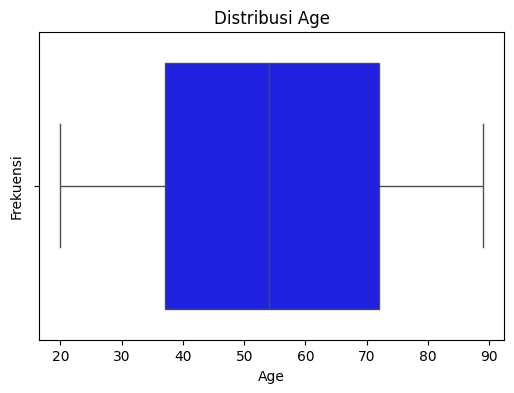

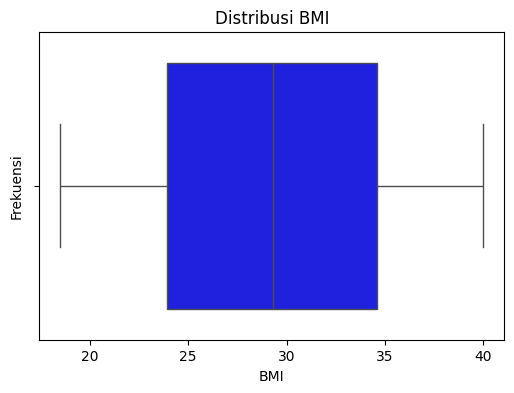

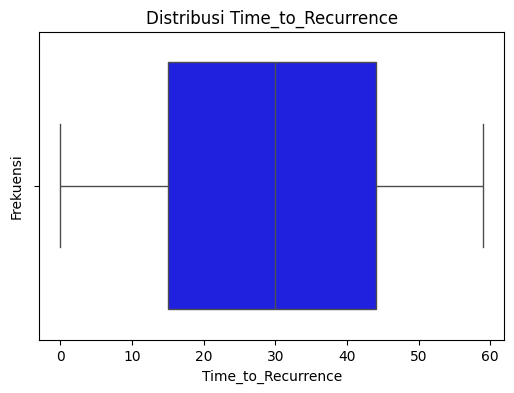

In [ ]:
for col in numeric_feature:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col], color='blue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

Berdasarkan analisis diatas dapat dilihat bahwa data numerik hampir terdistribusi normal jika kita menggunakan analisis kemiringan data. Namun, setelah dataset dianalisis lagi menggunakan metode saphiro wilk, data menunjukkan tidak terdistribusi normal. Karena kasus pada latihan ini bersifat klasifikasi, tidak wajib mengolah kembali data hingga menjadi terdistribusi normal.

### Analisis Fitur Kategorikal
Pada tahap ini, kita akan menganalisis distribusi data pada fitur kategorikal

In [ ]:
data[categorical_feature].nunique()

,0
Gender,2
Family_History,2
Previous_Cancer_History,2
Stage_at_Diagnosis,4
Tumor_Aggressiveness,3
Colonoscopy_Access,2
Screening_Regularity,3
Diet_Type,3
Physical_Activity_Level,3
Smoking_Status,3


        jumlah sampel  persentase
Gender                           
Male            49369        54.9
Female          40576        45.1


<ipython-input-15-e25b848eb86f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


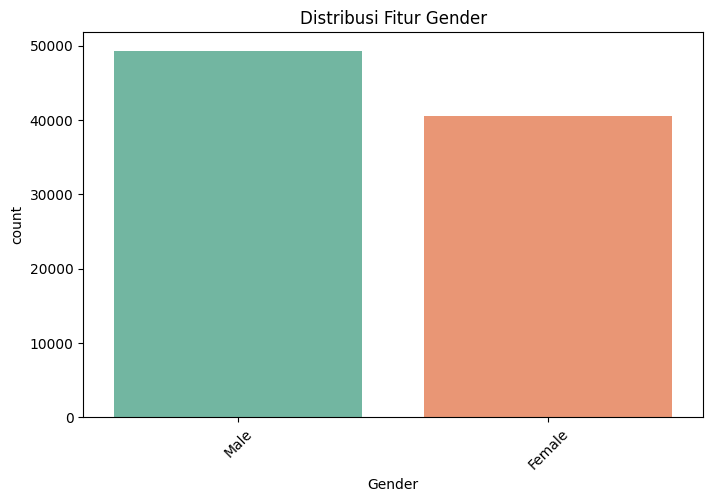

                jumlah sampel  persentase
Family_History                           
No                      67372        74.9
Yes                     22573        25.1


<ipython-input-15-e25b848eb86f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


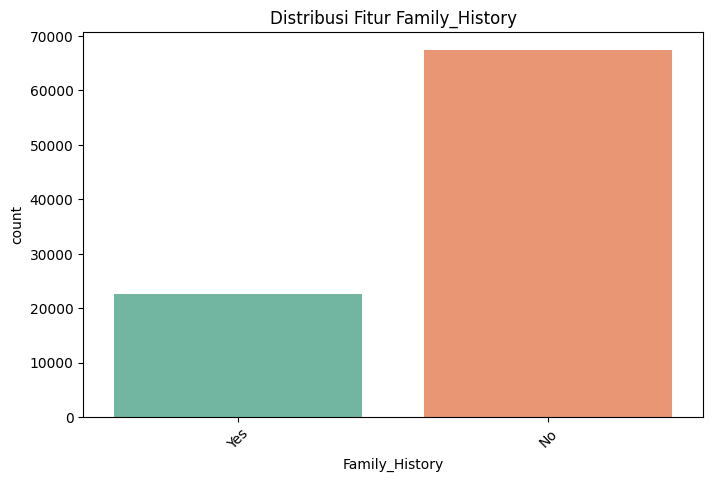

                         jumlah sampel  persentase
Previous_Cancer_History                           
No                               80985        90.0
Yes                               8960        10.0


<ipython-input-15-e25b848eb86f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


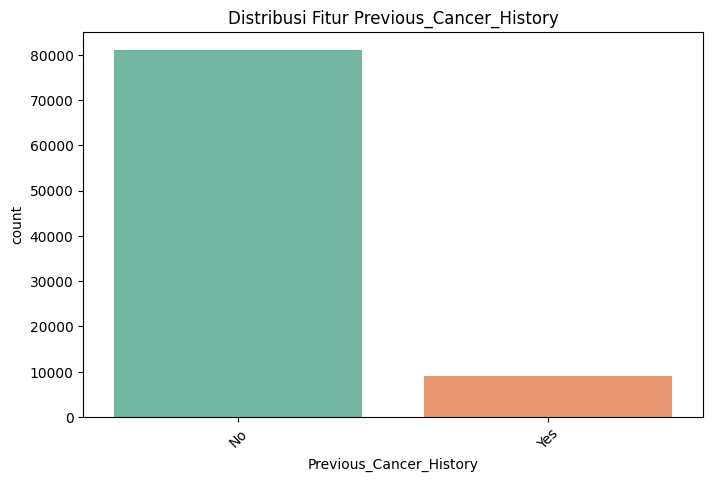

                    jumlah sampel  persentase
Stage_at_Diagnosis                           
II                          26869        29.9
I                           22594        25.1
III                         22412        24.9
IV                          18070        20.1


<ipython-input-15-e25b848eb86f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


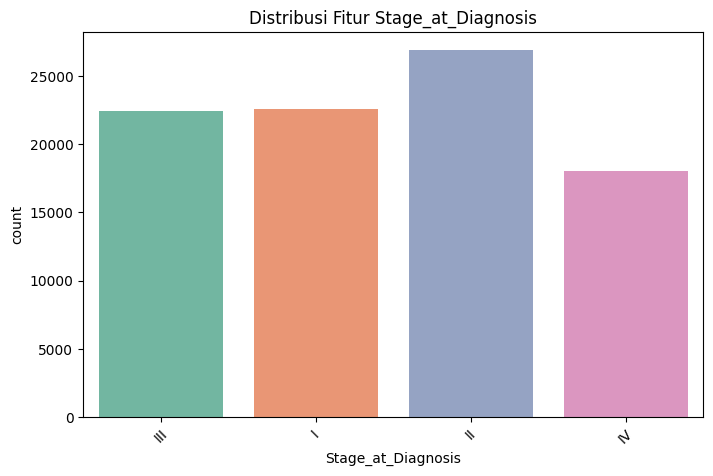

                      jumlah sampel  persentase
Tumor_Aggressiveness                           
Medium                        35974        40.0
Low                           35931        39.9
High                          18040        20.1


<ipython-input-15-e25b848eb86f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


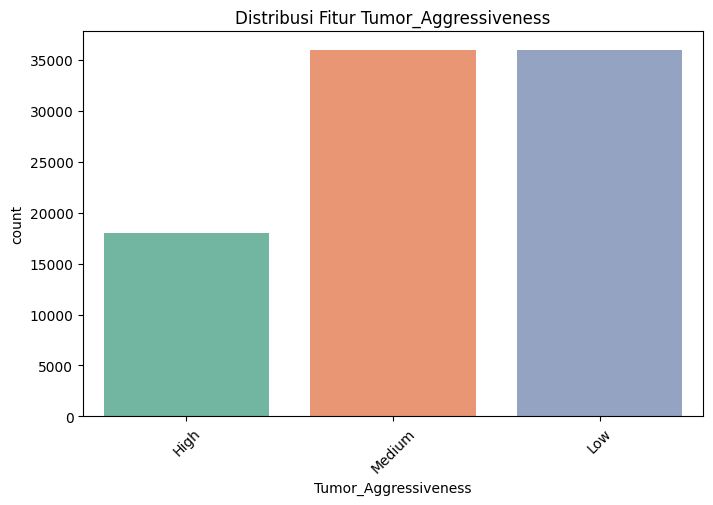

                    jumlah sampel  persentase
Colonoscopy_Access                           
Yes                         67567        75.1
No                          22378        24.9


<ipython-input-15-e25b848eb86f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


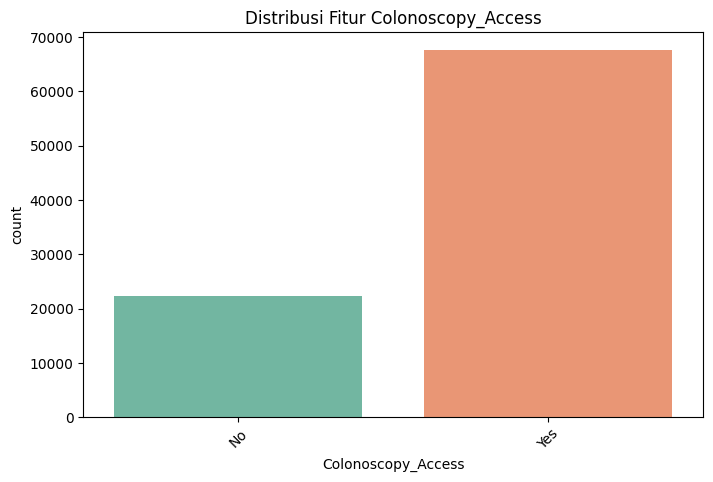

                      jumlah sampel  persentase
Screening_Regularity                           
Regular                       45162        50.2
Irregular                     27101        30.1
Never                         17682        19.7


<ipython-input-15-e25b848eb86f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


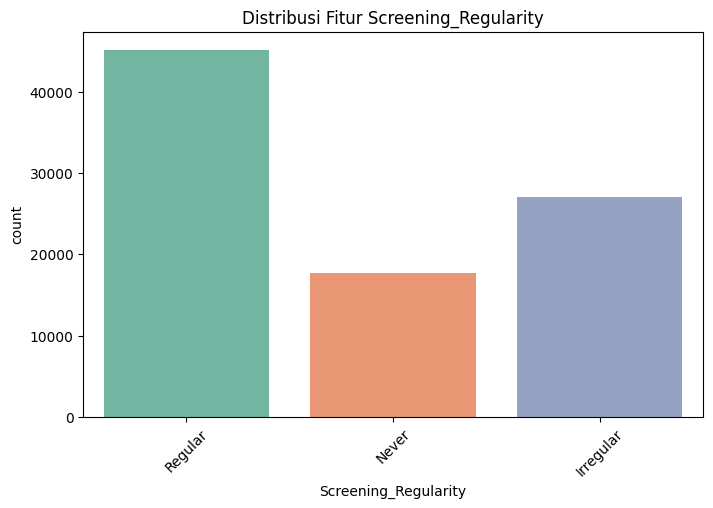

             jumlah sampel  persentase
Diet_Type                             
Western              44710        49.7
Balanced             27072        30.1
Traditional          18163        20.2


<ipython-input-15-e25b848eb86f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


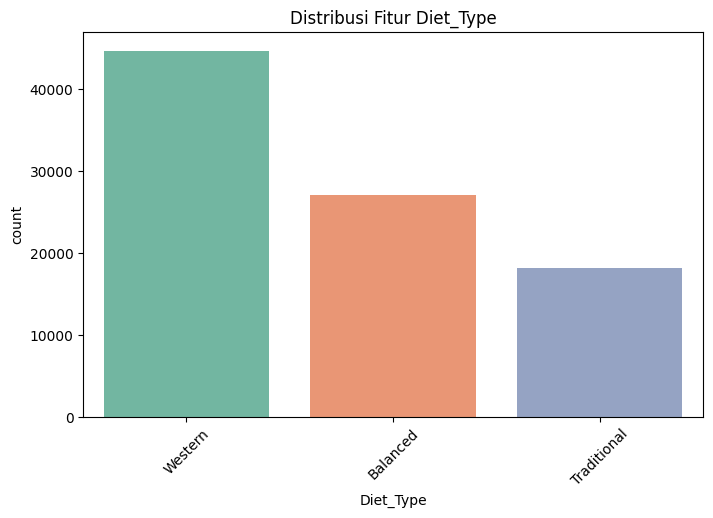

                         jumlah sampel  persentase
Physical_Activity_Level                           
Low                              44867        49.9
Medium                           31420        34.9
High                             13658        15.2


<ipython-input-15-e25b848eb86f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


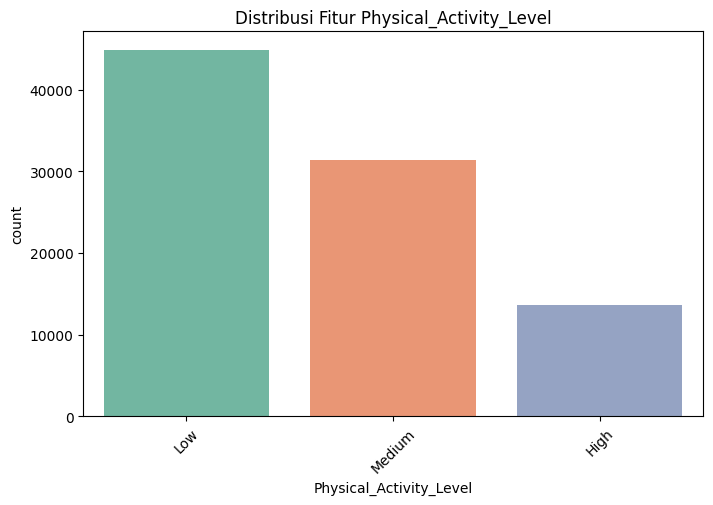

                jumlah sampel  persentase
Smoking_Status                           
Never                   44946        50.0
Former                  26900        29.9
Current                 18099        20.1


<ipython-input-15-e25b848eb86f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


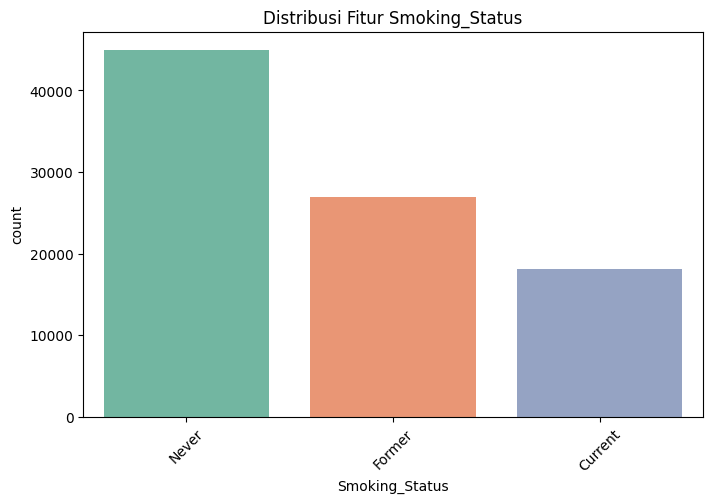

                     jumlah sampel  persentase
Alcohol_Consumption                           
Low                          45010        50.0
Medium                       26982        30.0
High                         17953        20.0


<ipython-input-15-e25b848eb86f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


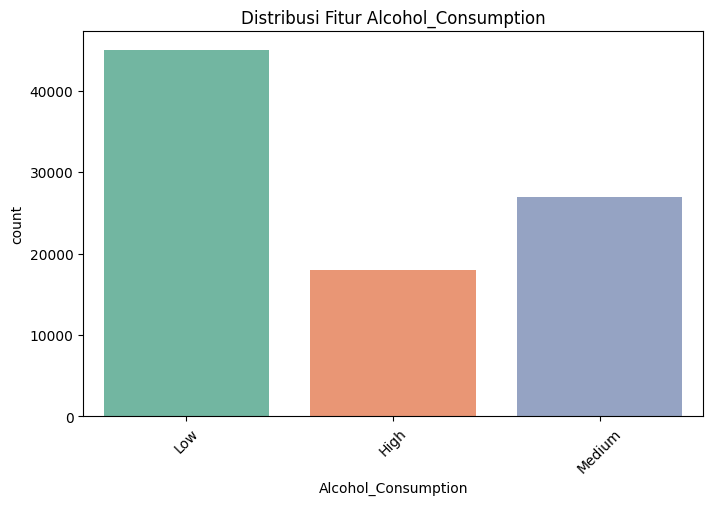

                      jumlah sampel  persentase
Red_Meat_Consumption                           
Low                           36191        40.2
Medium                        35830        39.8
High                          17924        19.9


<ipython-input-15-e25b848eb86f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


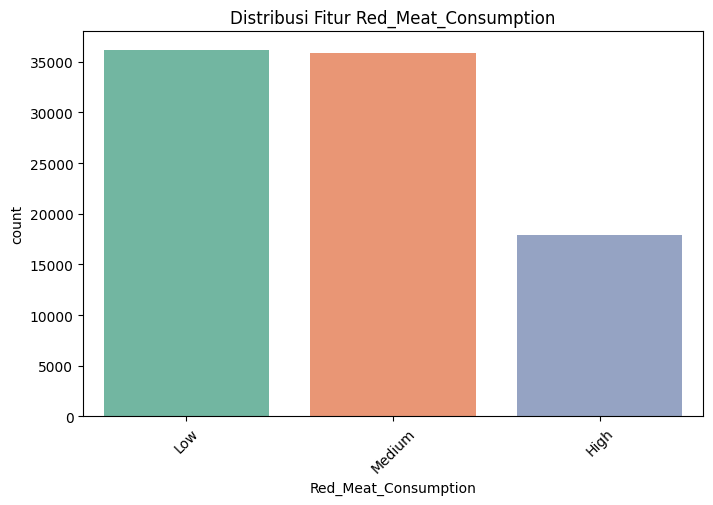

                   jumlah sampel  persentase
Fiber_Consumption                           
Medium                     44839        49.9
Low                        27198        30.2
High                       17908        19.9


<ipython-input-15-e25b848eb86f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


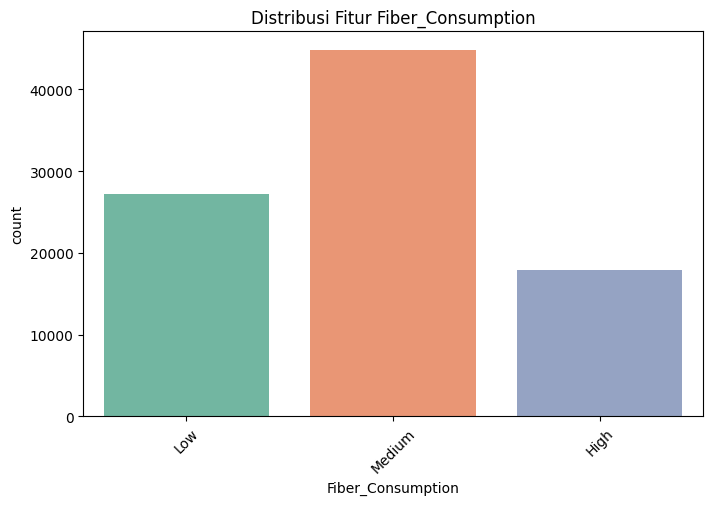

                    jumlah sampel  persentase
Insurance_Coverage                           
Yes                         72118        80.2
No                          17827        19.8


<ipython-input-15-e25b848eb86f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


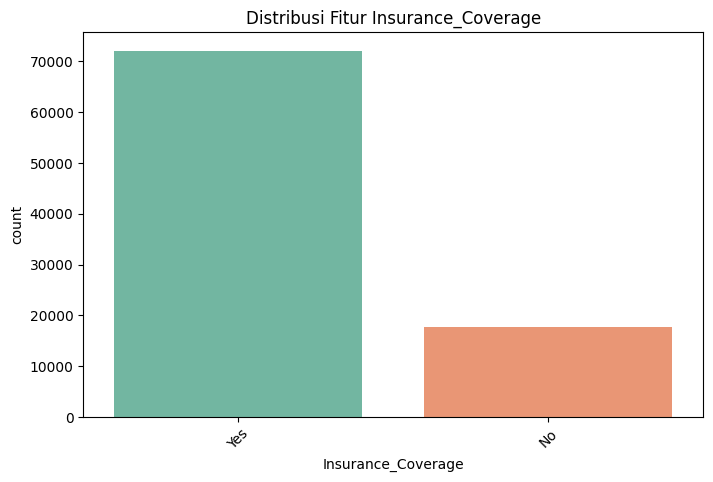

                   jumlah sampel  persentase
Time_to_Diagnosis                           
Timely                     54080        60.1
Delayed                    35865        39.9


<ipython-input-15-e25b848eb86f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


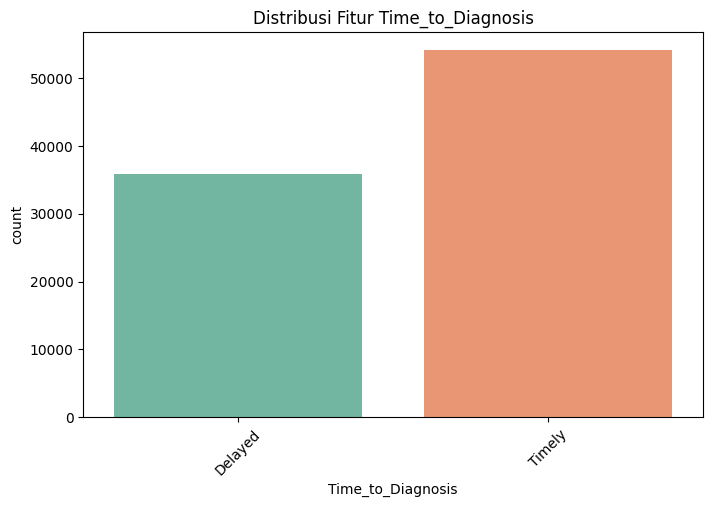

                  jumlah sampel  persentase
Treatment_Access                           
Good                      62897        69.9
Limited                   27048        30.1


<ipython-input-15-e25b848eb86f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


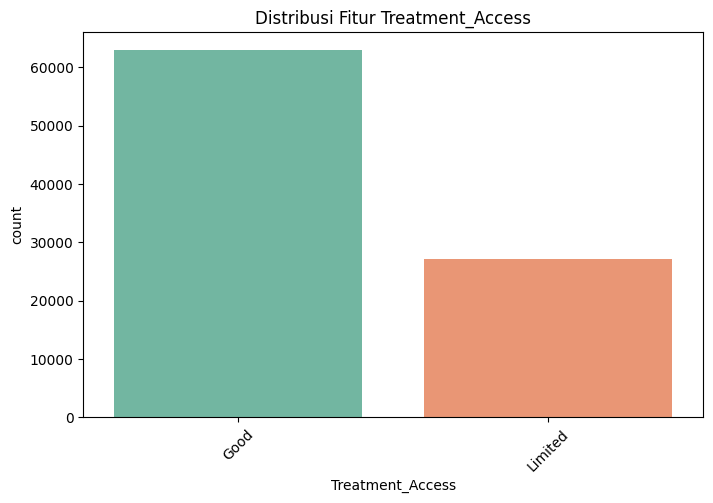

                       jumlah sampel  persentase
Chemotherapy_Received                           
Yes                            45067        50.1
No                             44878        49.9


<ipython-input-15-e25b848eb86f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


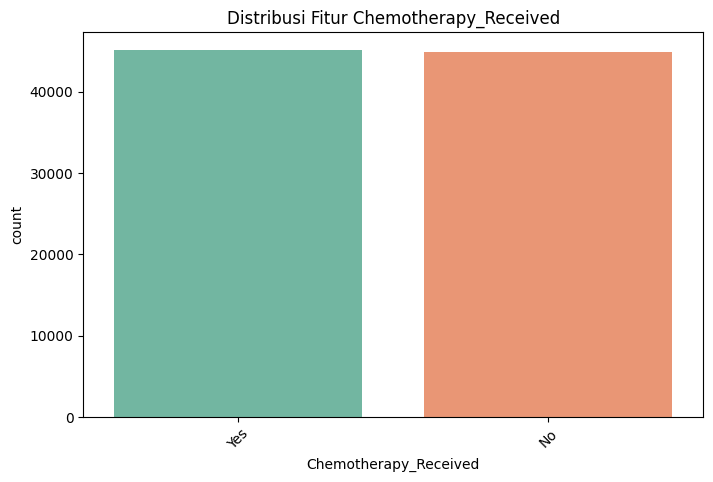

                       jumlah sampel  persentase
Radiotherapy_Received                           
No                             53952        60.0
Yes                            35993        40.0


<ipython-input-15-e25b848eb86f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


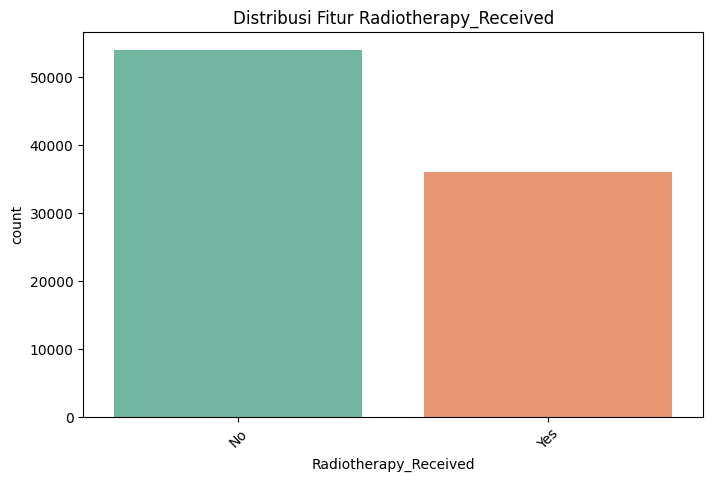

                  jumlah sampel  persentase
Surgery_Received                           
Yes                       62879        69.9
No                        27066        30.1


<ipython-input-15-e25b848eb86f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


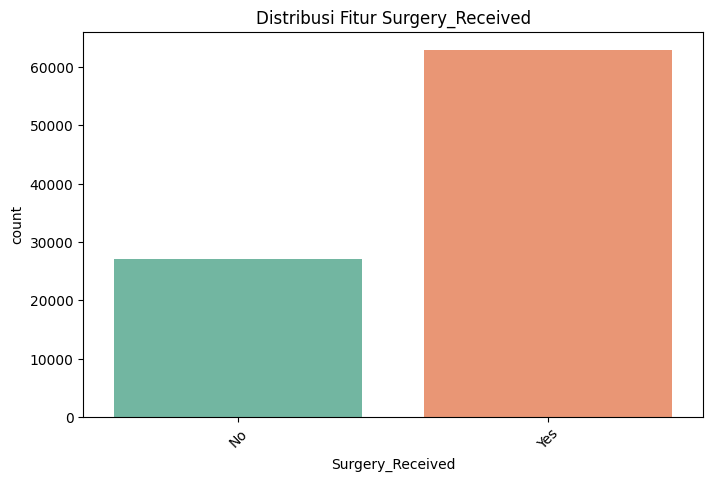

                     jumlah sampel  persentase
Follow_Up_Adherence                           
Good                         54041        60.1
Poor                         35904        39.9


<ipython-input-15-e25b848eb86f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


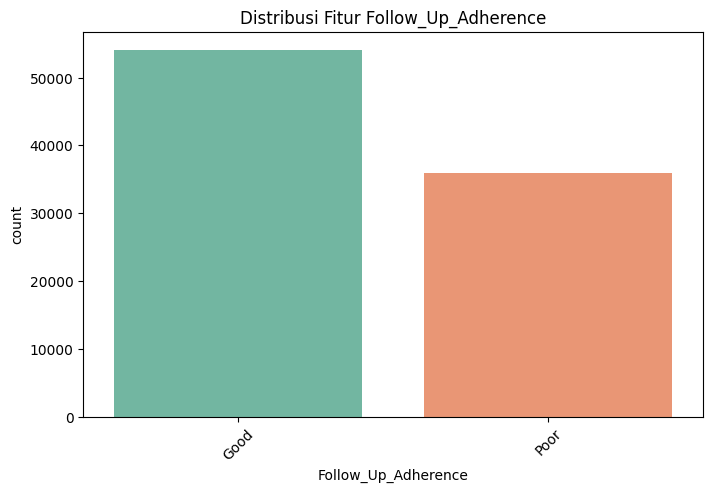

                 jumlah sampel  persentase
Survival_Status                           
Survived                 67341        74.9
Deceased                 22604        25.1


<ipython-input-15-e25b848eb86f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


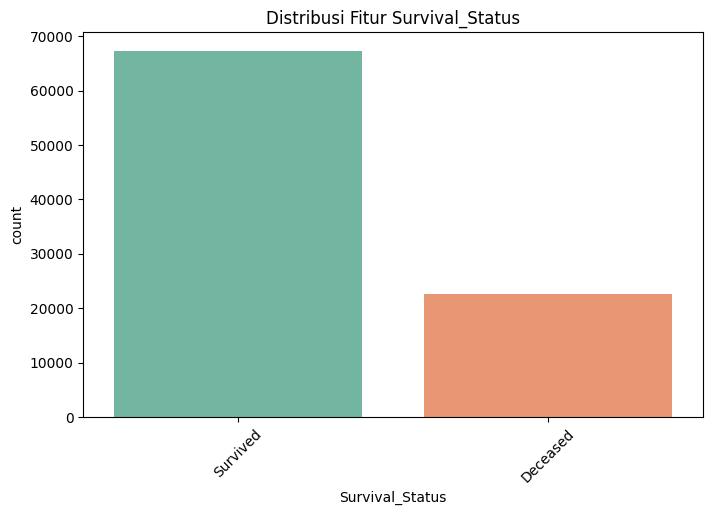

            jumlah sampel  persentase
Recurrence                           
No                  62975        70.0
Yes                 26970        30.0


<ipython-input-15-e25b848eb86f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[col], palette='Set2')


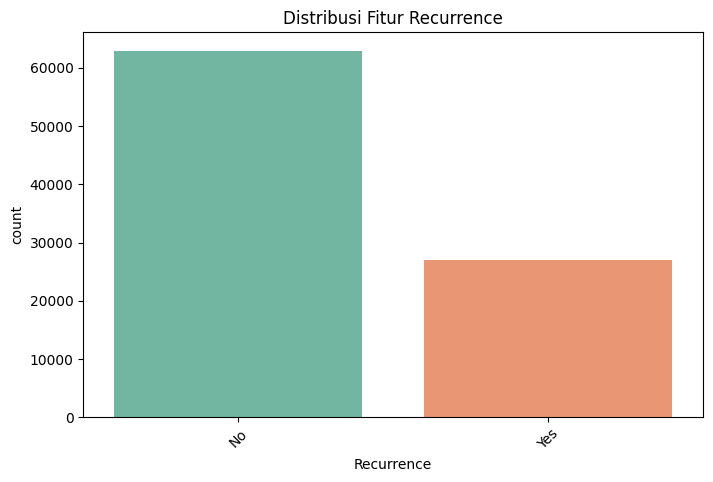

In [ ]:
for col in categorical_feature:
  percent = 100*data[col].value_counts(normalize=True)
  count = data[col].value_counts()
  df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
  print(df)

  plt.figure(figsize=(8, 5))
  sns.countplot(x=data[col], palette='Set2')
  plt.xticks(rotation=45)
  plt.title(f'Distribusi Fitur {col}')
  plt.show()

Berdasarkan visualisasi sampel diatas, berikut merupakan informasi yang diperoleh.


1.   Penderita kanker usus besar sebagian besar pria, yaitu lebih dari 54%
2.   Sebagian besar penderita kanker usus besar tidak memiliki riwayat keluarga dengan penyakit yang sama. Hal ini memperlihatkan riwayat keluarga tidak begitu berpengaruh pada penyakit ini (74%).
3.   Sebagin besar penderita kanker bahkan tidak memiliki riwayat kanker sebelumnya (90%).
4.   Sampel diambil dari berbagai pasien dengan stadium kanker berbeda. Pada sampel, kanker stadium 3 paling banyak diderita pasien.
5.   Sebagian besar pasien memiliki tumor dengan keganasan tingkat menengah dan rendah.
6.   Pasien yang memiliki akses kolonoskopi lebih banyak daripada yang tidak ada.
7.   Pasien dengan kebiasaan diet barat lebih dominan dari tipe diet lain.



# EDA - Multivariate Analysis

### Analisis Fitur Numerik

Untuk multivariate analysis pada fitur numerik akan menggunakan Spearman Correlation. Metode Spearman Correlation dipilih karena diantara variabel numerik tidak terdistribusi normal.

In [ ]:
from scipy.stats import mannwhitneyu, pearsonr
import numpy as np

**Spearman Correlation**

In [ ]:
corr_matrices = data[numeric_feature].corr(method='spearman')
corr_matrices

,Age,BMI,Time_to_Recurrence
Age,1.000000,0.003889,-0.000762
BMI,0.003889,1.000000,-0.000980
Time_to_Recurrence,-0.000762,-0.000980,1.000000


Hasil uji korelasi diatas menunjukkan bahwa fitur BMI dan Age memiliki hubungan yang lemah karena nilai nya antara 0.0 - 0.3. Hal ini berarti keduanya bukan data redundansi dan data yang unik sehingga tidak perlu direduksi. Berikutnya merupakan uji signifikansi statistik dengan uji t untuk  memastikan bahwa korelasi yang diamati tidak terjadi secara kebetulan. Jika nilai p-value < 0.05, korelasi dianggap signifikan secara statistik.

In [ ]:
corr, p_value = pearsonr(data['Age'], data['BMI'])
print(f"Korelasi: {corr}, P-value: {p_value}")

Korelasi: 0.0038647011515347573, P-value: 0.246438149773278


Selanjutnya kita akan melakukan analisis antara fitur numerik dan fitur target. Analisis dilakukan untuk melihat distribusi data pada tiap target kategori

Sebelumnya kita akan melakukan One Hot Encoding dahulu pada fitur Survival_Status untuk memudahkan dalam melakukan analisis.

**One Hot Encoding**

In [ ]:
one_hot_data = pd.concat([data, pd.get_dummies(data['Survival_Status'], dtype=int)], axis=1)
one_hot_data = one_hot_data.drop(columns=['Survival_Status', 'Deceased'])
one_hot_data.head()

,Age,Gender,Family_History,Previous_Cancer_History,Stage_at_Diagnosis,Tumor_Aggressiveness,Colonoscopy_Access,Screening_Regularity,Diet_Type,BMI,...,Insurance_Coverage,Time_to_Diagnosis,Treatment_Access,Chemotherapy_Received,Radiotherapy_Received,Surgery_Received,Follow_Up_Adherence,Recurrence,Time_to_Recurrence,Survived
0,71,Male,Yes,No,III,High,No,Regular,Western,33.0,...,Yes,Delayed,Good,Yes,No,No,Good,No,16,1
1,34,Female,No,No,I,Medium,Yes,Regular,Western,33.1,...,No,Timely,Good,No,Yes,Yes,Poor,No,28,0
2,80,Female,No,No,III,Low,Yes,Regular,Balanced,20.7,...,Yes,Timely,Limited,No,Yes,Yes,Good,No,26,1
3,40,Male,No,No,I,Medium,Yes,Never,Traditional,38.9,...,Yes,Delayed,Limited,Yes,No,Yes,Poor,No,44,0
4,43,Female,Yes,No,III,Low,Yes,Never,Traditional,24.8,...,No,Delayed,Good,Yes,No,Yes,Poor,Yes,20,0


In [ ]:
one_hot_data[['Survived', 'Age', 'BMI', 'Time_to_Recurrence']].groupby(by='Survived').agg('mean')

,Age,BMI,Time_to_Recurrence
Survived,,,
0,54.245532,29.240157,29.481198
1,54.362216,29.277486,29.564144


Berdasarkan analisis diatas, rata-rata usia pasien yang bertahan hidup dan tidak relatif sama, yaitu 54 tahun, dengan BMI yang relatif sama juga, yaitu 29 kg, serta waktu untuk kambuh kembali 29 tahun Mari kita lihat kernel density estimate (KDE) dari kedua variabel numerik.

**KDE Visualization**

<Axes: xlabel='Age', ylabel='Density'>

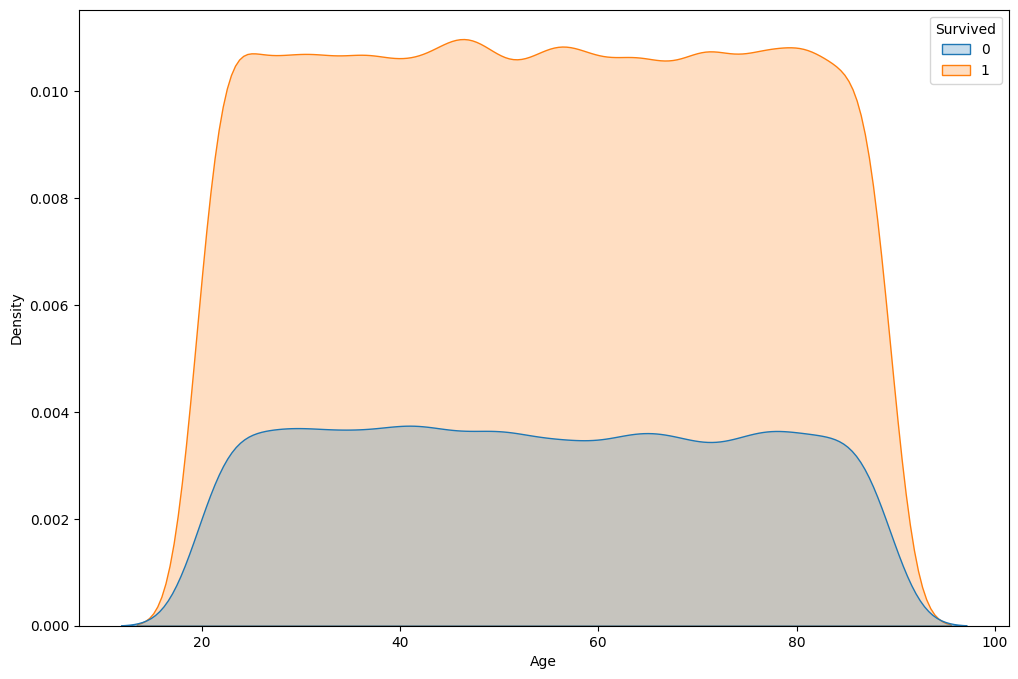

In [ ]:
plt.figure(figsize=(12, 8))
sns.kdeplot(data=one_hot_data[['Survived', 'Age', 'BMI', 'Time_to_Recurrence']], x='Age', hue='Survived', fill=True)

<Axes: xlabel='BMI', ylabel='Density'>

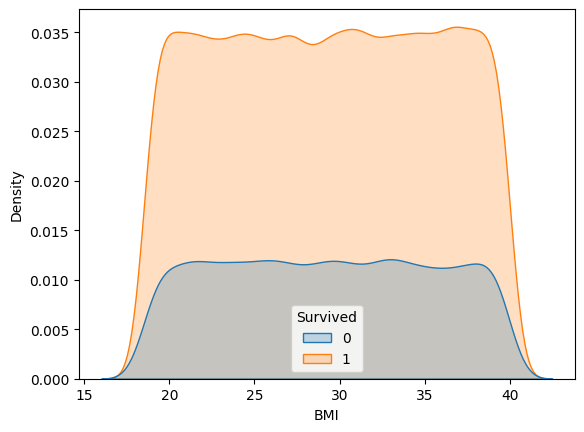

In [ ]:
sns.kdeplot(data=one_hot_data[['Survived', 'Age', 'BMI', 'Time_to_Recurrence']], x='BMI', hue='Survived', fill=True)

<Axes: xlabel='Time_to_Recurrence', ylabel='Density'>

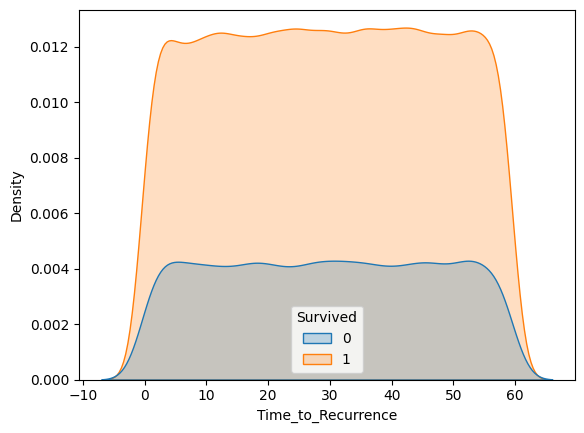

In [ ]:
sns.kdeplot(data=one_hot_data[['Survived', 'Age', 'BMI', 'Time_to_Recurrence']], x='Time_to_Recurrence', hue='Survived', fill=True)

### Analisis Fitur Kategorikal

Multivariate analysis pada fitur-fitur kategorikal akan menggunakan contingency table untuk melihat korelasi dengan fitur target. Kemudian contingency table dipastikan kembali dengan chi square. Jika p-value < 0.05, berarti fitur tersebut memiliki korelasi yang kuat dengan fitur target.

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
categorical_feature = one_hot_data.select_dtypes(include=['object']).columns

In [ ]:
for col in categorical_feature:
  contingency_table= pd.crosstab(data[col], one_hot_data['Survived'])
  print(contingency_table, '\n')
  chi2, p, dof, expected = chi2_contingency(contingency_table)
  print(f"p-value of chi-square: {p}\n\n")

Survived      0      1
Gender                
Female    10298  30278
Male      12306  37063 

p-value of chi-square: 0.12097928815791241


Survived            0      1
Family_History              
No              16967  50405
Yes              5637  16936 

p-value of chi-square: 0.5313978973112925


Survived                     0      1
Previous_Cancer_History              
No                       20350  60635
Yes                       2254   6706 

p-value of chi-square: 0.9637605793921106


Survived               0      1
Stage_at_Diagnosis             
I                   5700  16894
II                  6782  20087
III                 5603  16809
IV                  4519  13551 

p-value of chi-square: 0.8884717474815385


Survived                 0      1
Tumor_Aggressiveness             
High                  4573  13467
Low                   9095  26836
Medium                8936  27038 

p-value of chi-square: 0.2589452680753244


Survived                0      1
Colonoscopy_Ac

Berdasarkan contingency table dan chi square diatas, terlihat bahwa hanya fitur 'Radiotherapy_Received' yang memiliki korelasi kuat dengan fitur target. Sedangkan fitur yang berkorelasi terjauh dengan fitur target diantaranya yaitu fitur 'Previous_Cancer_History', 'Stage_at_Diagnosis', 'Physical_Activity_Level', 'Colonoscopy_Access', 'Screening_Regularity', 'Smoking_Status', 'Alcohol_Consumption', 'Recurrence' dan 'Time_to_Diagnosis'. Oleh karena itu, keempat fitur akan dihapus.

In [ ]:
one_hot_data = one_hot_data.drop(columns=['Previous_Cancer_History', 'Stage_at_Diagnosis', 'Physical_Activity_Level', 'Time_to_Diagnosis', 'Colonoscopy_Access', 'Screening_Regularity', 'Smoking_Status', 'Alcohol_Consumption', 'Recurrence'])

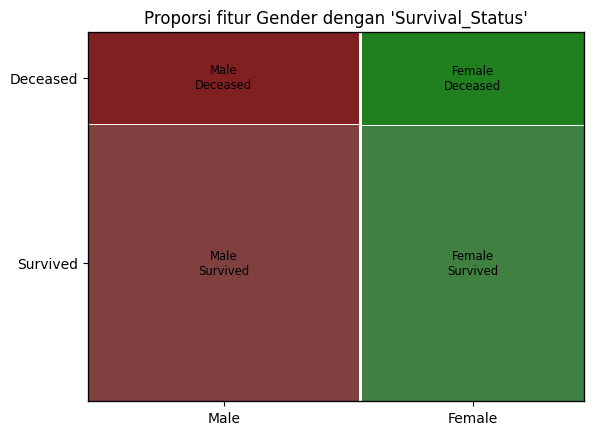

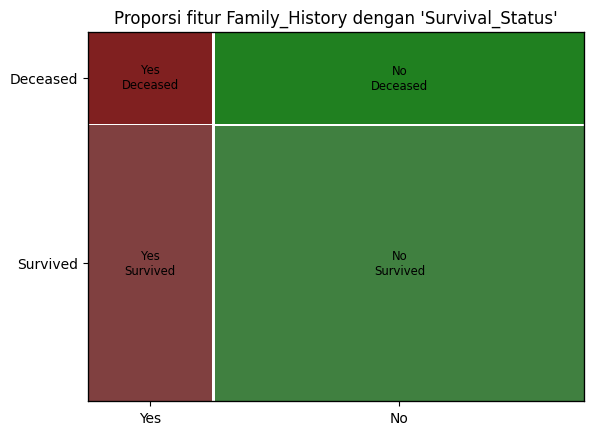

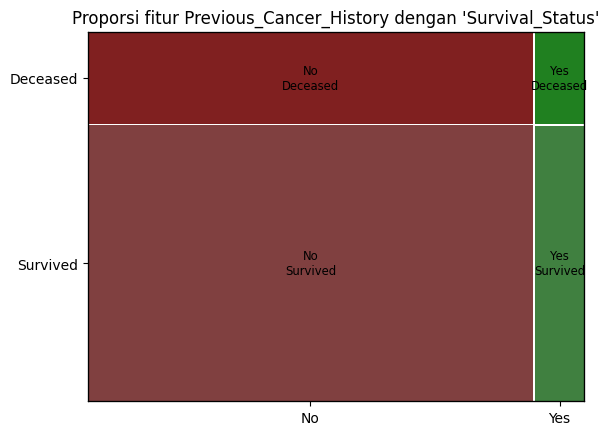

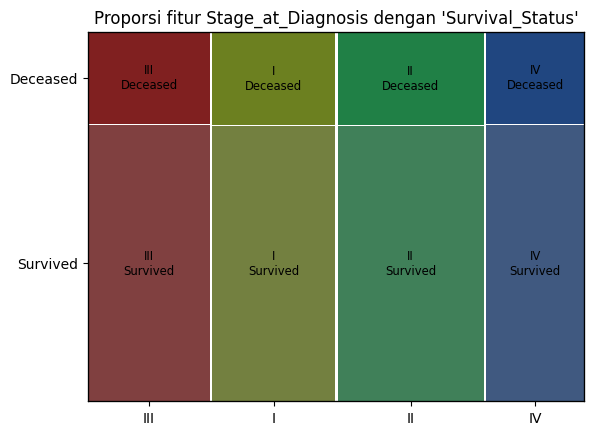

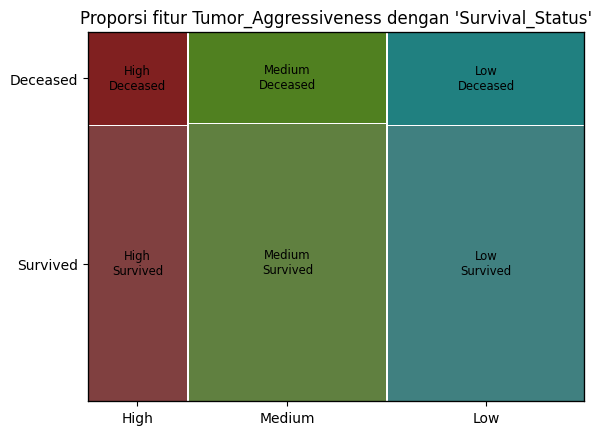

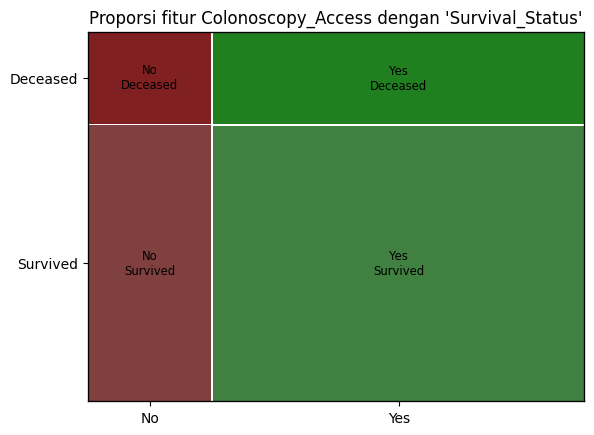

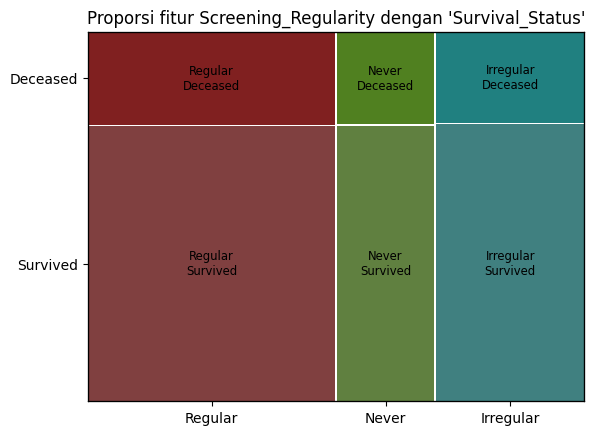

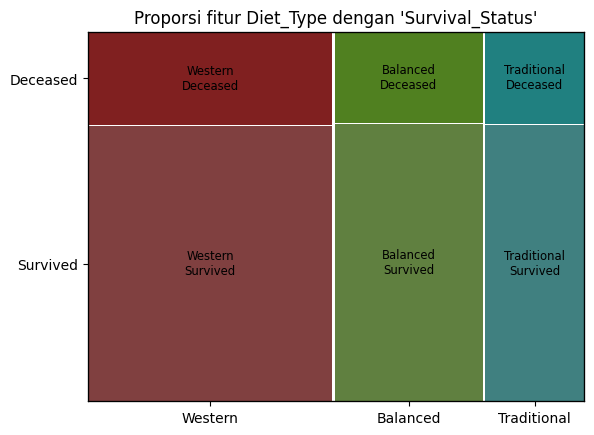

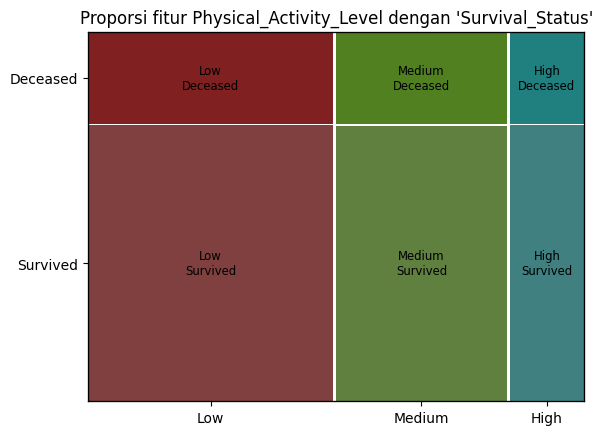

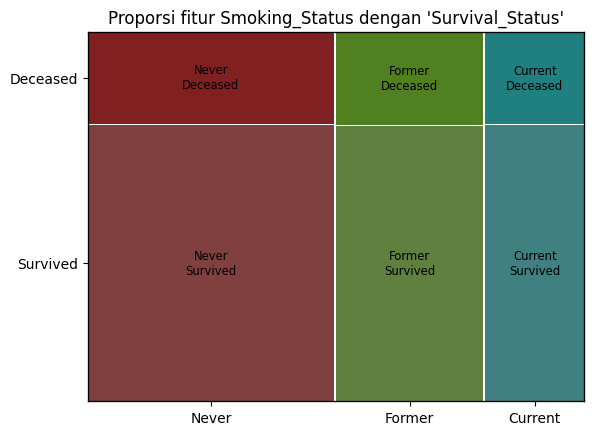

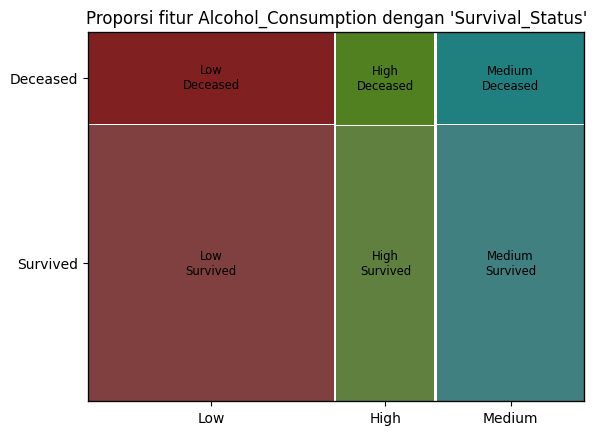

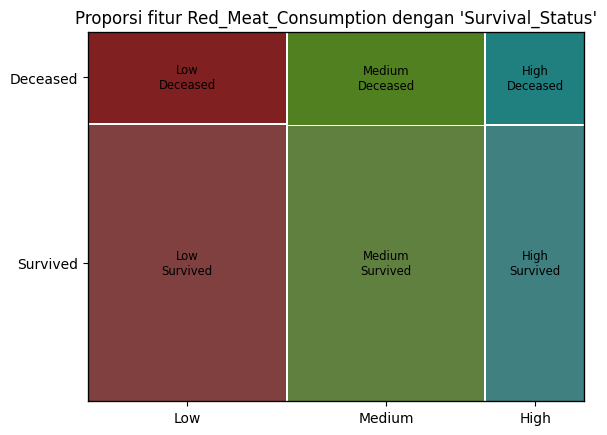

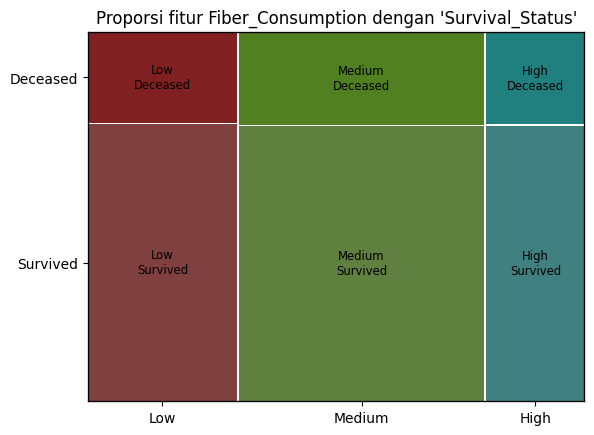

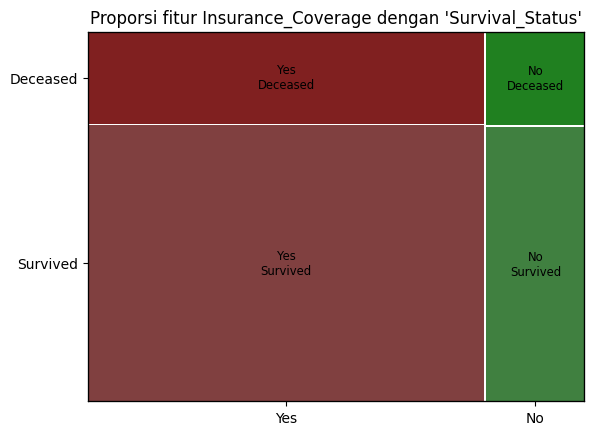

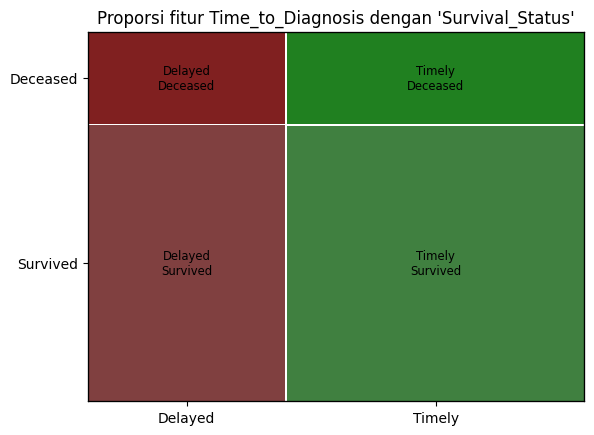

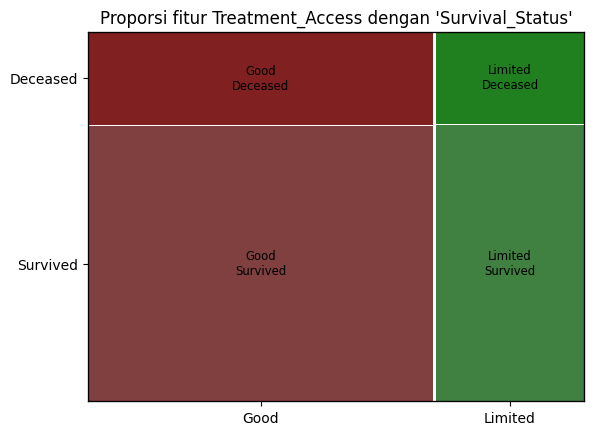

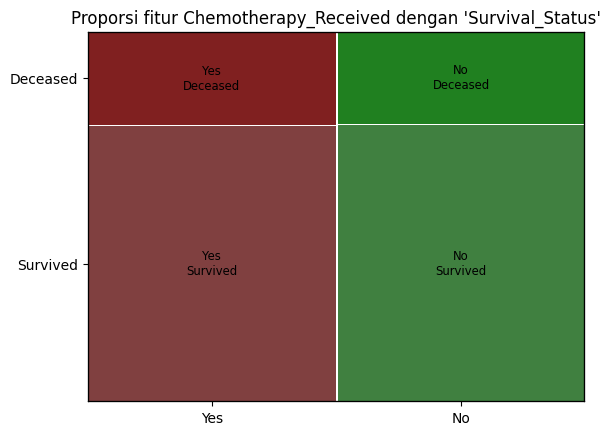

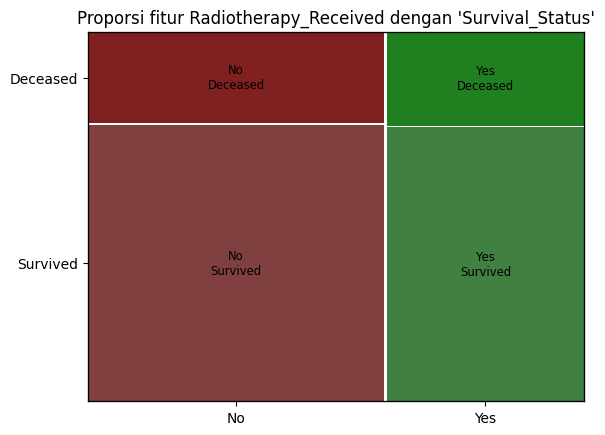

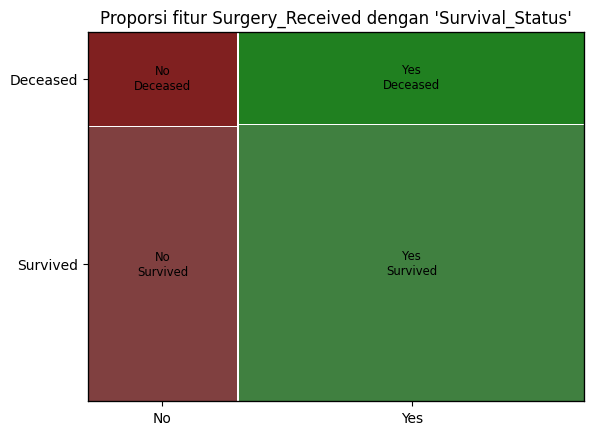

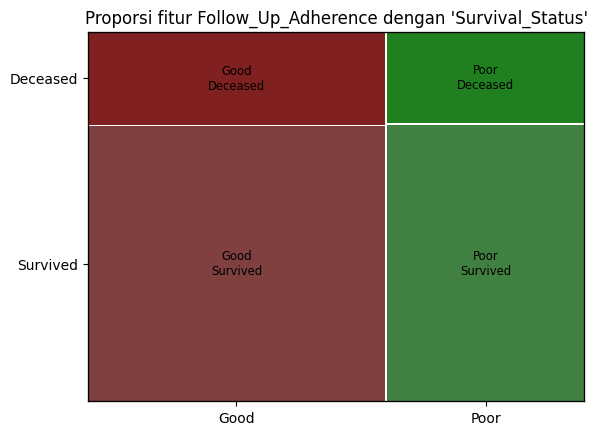

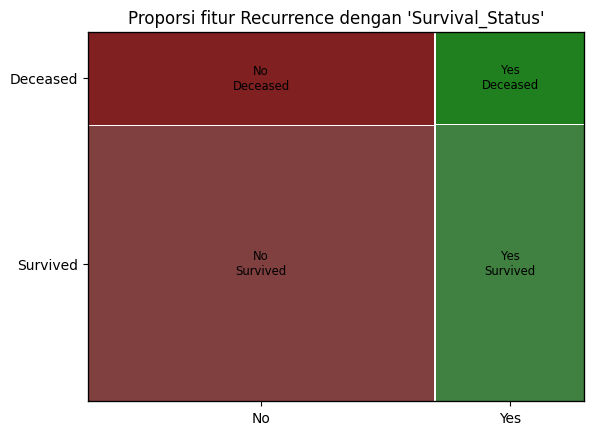

In [ ]:
for col in categorical_feature:
  mosaic(data, [col, 'Survival_Status'])
  plt.title(f"Proporsi fitur {col} dengan 'Survival_Status'")
  plt.show()


Berdasarkan grafik mosaic diatas, semua fitur kategorikal memiliki korelasi dengan fitur target 'Survival_Status', meskipun bukan korelasi yang kuat, karena proporsi grafik menunjukkan perbedaan ukuran.

# Data Preparation

Oleh karena semua fitur numerik sudah dihapus pada tahap sebelumnya maka yang akan digunakan untuk melatih model adalah fitur-fitur kategorikal. Pada tahap ini, fitur kategorikal akan diubah terlebih dahulu menjadi bentuk one hot encoding agar lebih mudah dipahami model.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
categorical_feature = one_hot_data.select_dtypes(include=['object']).columns
numerical_feature = one_hot_data.select_dtypes(include=['float64', 'int64']).columns

In [ ]:
for col in categorical_feature:
  one_hot_data = pd.concat([one_hot_data, pd.get_dummies(one_hot_data[col], dtype=int)], axis=1)
  one_hot_data = one_hot_data.drop(columns=col)

In [ ]:
one_hot_data.head()

,Age,BMI,Time_to_Recurrence,Survived,Female,Male,No_6,Yes_7,High_8,Low_9,...,Good_22,Limited,No_24,Yes_25,No_26,Yes_27,No_28,Yes_29,Good_30,Poor
0,0.825836,0.600791,-0.784285,1,0,1,0,1,1,0,...,1,0,0,1,1,0,1,0,1,0
1,-1.007471,0.616890,-0.089372,0,1,0,1,0,0,0,...,1,0,1,0,0,1,0,1,0,1
2,1.271775,-1.379364,-0.205190,1,1,0,1,0,0,1,...,0,1,1,0,0,1,0,1,1,0
3,-0.710178,1.550622,0.837179,0,0,1,1,0,0,0,...,0,1,0,1,1,0,0,1,0,1
4,-0.561532,-0.719312,-0.552647,0,1,0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,1


Terlihat bahwa one hot encoding diatas menghasilkan nama kolom yang sama. Ubah semua nama kolom yang dengan menambahkan angka unik agar tidak terjadi duplikasi nama kolom.

In [ ]:
one_hot_data.columns =  [f"{col}_{i}" if one_hot_data.columns.tolist().count(col) > 1 else col
              for i, col in enumerate(one_hot_data.columns)]

In [ ]:
one_hot_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89945 entries, 0 to 89944
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 89945 non-null  float64
 1   BMI                 89945 non-null  float64
 2   Time_to_Recurrence  89945 non-null  float64
 3   Survived            89945 non-null  int64  
 4   Female              89945 non-null  int64  
 5   Male                89945 non-null  int64  
 6   No_6                89945 non-null  int64  
 7   Yes_7               89945 non-null  int64  
 8   High_8              89945 non-null  int64  
 9   Low_9               89945 non-null  int64  
 10  Medium_10           89945 non-null  int64  
 11  Balanced            89945 non-null  int64  
 12  Traditional         89945 non-null  int64  
 13  Western             89945 non-null  int64  
 14  High_14             89945 non-null  int64  
 15  Low_15              89945 non-null  int64  
 16  Medi

Fitur numerik akan dilakukan standarisasi dengan teknik StandardScaler dari ScikitLearn.

In [ ]:
numerical_feature = numerical_feature.drop('Survived')
scaler = StandardScaler()
scaler.fit(one_hot_data[numerical_feature])
one_hot_data[numerical_feature] = scaler.transform(one_hot_data[numerical_feature])
one_hot_data.head()

,Age,BMI,Time_to_Recurrence,Survived,Female,Male,No_6,Yes_7,High_8,Low_9,...,Good_22,Limited,No_24,Yes_25,No_26,Yes_27,No_28,Yes_29,Good_30,Poor
0,0.825836,0.600791,-0.784285,1,-0.906583,0.906583,-1.727607,1.727607,1.996463,-0.815608,...,0.655772,-0.655772,-0.997901,0.997901,0.816780,-0.816780,1.524196,-1.524196,0.815098,-0.815098
1,-1.007471,0.616890,-0.089372,0,1.103043,-1.103043,0.578835,-0.578835,-0.500886,-0.815608,...,0.655772,-0.655772,1.002103,-1.002103,-1.224319,1.224319,-0.656084,0.656084,-1.226847,1.226847
2,1.271775,-1.379364,-0.205190,1,1.103043,-1.103043,0.578835,-0.578835,-0.500886,1.226079,...,-1.524921,1.524921,1.002103,-1.002103,-1.224319,1.224319,-0.656084,0.656084,0.815098,-0.815098
3,-0.710178,1.550622,0.837179,0,-0.906583,0.906583,0.578835,-0.578835,-0.500886,-0.815608,...,-1.524921,1.524921,-0.997901,0.997901,0.816780,-0.816780,-0.656084,0.656084,-1.226847,1.226847
4,-0.561532,-0.719312,-0.552647,0,1.103043,-1.103043,-1.727607,1.727607,-0.500886,1.226079,...,0.655772,-0.655772,-0.997901,0.997901,0.816780,-0.816780,-0.656084,0.656084,-1.226847,1.226847


Setelah kolom kategorikal sudah diubah, selanjutnya akan dilakukan pembagian dataset menjadi data latih dan data test. Karena jumlah nya sangat banyak, maka kita hanya akan mengambil 0.05 bagian data set untuk data testnya.

In [ ]:
X = one_hot_data.drop(["Survived"],axis =1)
y = one_hot_data["Survived"]

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89945 entries, 0 to 89944
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 89945 non-null  float64
 1   BMI                 89945 non-null  float64
 2   Time_to_Recurrence  89945 non-null  float64
 3   Female              89945 non-null  float64
 4   Male                89945 non-null  float64
 5   No_6                89945 non-null  float64
 6   Yes_7               89945 non-null  float64
 7   High_8              89945 non-null  float64
 8   Low_9               89945 non-null  float64
 9   Medium_10           89945 non-null  float64
 10  Balanced            89945 non-null  float64
 11  Traditional         89945 non-null  float64
 12  Western             89945 non-null  float64
 13  High_14             89945 non-null  float64
 14  Low_15              89945 non-null  float64
 15  Medium_16           89945 non-null  float64
 16  High

**Splitting data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.05, random_state = 123)

In [ ]:
print(f'Total # of sample in whole dataset: {len(y_train)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 85447
Total # of sample in train dataset: 85447
Total # of sample in test dataset: 4498


# Model Development

Pada latihan ini, model yang akan diuji ada 6 model, yaitu Logistic Regression, Decision Tree,

In [ ]:
!pip install bayesian-optimization

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 6.9 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
import lightgbm as lgb
import optuna
from scipy.stats import loguniform, uniform, randint
from bayes_opt import BayesianOptimization

In [ ]:
models = pd.DataFrame(columns=['train_mse', 'test_mse'],
                      index=['Decission Tree', 'Random Forest', 'LightGBM'])

## Decision Tree

In [ ]:
def objective(trial):
    max_depth = trial.suggest_int('max_depth', 10, 100, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        criterion=criterion,
        random_state=42
    )

    score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()
    return score

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2025-02-26 04:37:31,981] A new study created in memory with name: no-name-ebac4491-a6fa-4a55-8abc-63890b836dcd
[I 2025-02-26 04:37:32,407] Trial 0 finished with value: 0.6577059695659572 and parameters: {'max_depth': 30, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'criterion': 'entropy'}. Best is trial 0 with value: 0.6577059695659572.
[I 2025-02-26 04:37:32,870] Trial 1 finished with value: 0.639367085283154 and parameters: {'max_depth': 34, 'min_samples_split': 9, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'criterion': 'entropy'}. Best is trial 0 with value: 0.6577059695659572.
[I 2025-02-26 04:37:33,295] Trial 2 finished with value: 0.6387936692901456 and parameters: {'max_depth': 21, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'criterion': 'gini'}. Best is trial 0 with value: 0.6577059695659572.
[I 2025-02-26 04:37:33,668] Trial 3 finished with value: 0.6980233799852851 and parameters: {'max_depth': 21, 'min_samples_split

In [ ]:
print("Best parameters found: ", study.best_params)
print("Best cross-validation score: {:.2f}".format(study.best_value))

Best parameters found:  {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_features': 'log2', 'criterion': 'entropy'}
Best cross-validation score: 0.74


In [ ]:
model_1 = DecisionTreeClassifier(**study.best_params, random_state=42)
model_1.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_leaf=8, min_samples_split=10,
                       random_state=42)

## Random Forest

In [ ]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 10, 100, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])

    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        random_state=42
    )

    score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()
    return score

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2025-02-26 04:37:50,997] A new study created in memory with name: no-name-1c67ee48-c4fe-47f7-ba17-74963be27ab1
[I 2025-02-26 04:40:26,642] Trial 0 finished with value: 0.7487682423703896 and parameters: {'n_estimators': 495, 'max_depth': 16, 'min_samples_split': 12, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 0 with value: 0.7487682423703896.
[I 2025-02-26 04:40:38,229] Trial 1 finished with value: 0.7487799452574918 and parameters: {'n_estimators': 53, 'max_depth': 36, 'min_samples_split': 11, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': True}. Best is trial 1 with value: 0.7487799452574918.
[I 2025-02-26 04:42:10,349] Trial 2 finished with value: 0.748779945668379 and parameters: {'n_estimators': 406, 'max_depth': 62, 'min_samples_split': 19, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 2 with value: 0.748779945668379.
[I 2025-02-26 04:44:23,812] Trial 3 finished with value: 0.7486746159864747

In [ ]:
print("Best parameters found: ", study.best_params)
print("Best cross-validation score: {:.2f}".format(study.best_value))

Best parameters found:  {'n_estimators': 406, 'max_depth': 62, 'min_samples_split': 19, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'bootstrap': True}
Best cross-validation score: 0.75


In [ ]:
model_2 = RandomForestClassifier(
        n_estimators=433,
        max_depth=16,
        min_samples_split=14,
        min_samples_leaf=1,
        max_features='log2',
        bootstrap=False,
        random_state=42
    )

In [ ]:
model_2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=16, max_features='log2',
                       min_samples_split=14, n_estimators=433, random_state=42)

## Light GBM

In [ ]:
def objective(trial):
    params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 20, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 1),
        'random_state': 42,
        'n_jobs': -1
    }

    model = lgb.LGBMClassifier(**params)

    score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()
    return score

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2025-02-26 05:44:38,333] A new study created in memory with name: no-name-415b8cbc-e201-40ee-a9f6-78deef48be98


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014782 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:44:43,184] Trial 0 finished with value: 0.748779945668379 and parameters: {'num_leaves': 117, 'max_depth': 5, 'learning_rate': 0.027812293728664894, 'n_estimators': 155, 'min_child_samples': 42, 'subsample': 0.6412945878779454, 'colsample_bytree': 0.8796943109900643, 'reg_alpha': 0.005755303883887897, 'reg_lambda': 0.7693162498894848}. Best is trial 0 with value: 0.748779945668379.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Info] Number of positive: 42654, number of negative: 14311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009086 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56965, number of used features: 31
[LightGBM] [Info] [bin

[I 2025-02-26 05:44:48,721] Trial 1 finished with value: 0.7486629135102595 and parameters: {'num_leaves': 37, 'max_depth': 15, 'learning_rate': 0.13433028935071947, 'n_estimators': 123, 'min_child_samples': 26, 'subsample': 0.8891917840779788, 'colsample_bytree': 0.9783022147647873, 'reg_alpha': 0.4220387517345324, 'reg_lambda': 0.4669278999372235}. Best is trial 0 with value: 0.748779945668379.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:44:56,359] Trial 2 finished with value: 0.7487331332981957 and parameters: {'num_leaves': 55, 'max_depth': 5, 'learning_rate': 0.0827853802863239, 'n_estimators': 159, 'min_child_samples': 61, 'subsample': 0.9545862739942612, 'colsample_bytree': 0.9263752215874413, 'reg_alpha': 0.34851064162718426, 'reg_lambda': 0.07761005416360278}. Best is trial 0 with value: 0.748779945668379.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Info] Number of positive: 42654, number of negative: 14311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008878 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56965, number of used features: 31
[LightGBM] [Info] [bin

[I 2025-02-26 05:45:08,428] Trial 3 finished with value: 0.7401781284768422 and parameters: {'num_leaves': 68, 'max_depth': 11, 'learning_rate': 0.18162647423682743, 'n_estimators': 327, 'min_child_samples': 52, 'subsample': 0.9912810684709537, 'colsample_bytree': 0.8432146728964576, 'reg_alpha': 0.6065669660417632, 'reg_lambda': 0.9424688174498924}. Best is trial 0 with value: 0.748779945668379.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008235 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Info] Number of positive: 42654, number of negative: 14311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008438 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56965, number of used features: 31
[LightGBM] [Info] [bin

[I 2025-02-26 05:45:21,834] Trial 4 finished with value: 0.7466148626588952 and parameters: {'num_leaves': 28, 'max_depth': 15, 'learning_rate': 0.14905416811161132, 'n_estimators': 491, 'min_child_samples': 51, 'subsample': 0.8085514907838749, 'colsample_bytree': 0.7426897464954416, 'reg_alpha': 0.9468171383617211, 'reg_lambda': 0.5167653143953714}. Best is trial 0 with value: 0.748779945668379.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021589 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Info] Number of positive: 42654, number of negative: 14311
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018358 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56965, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748776 -> initscore=1.092093
[LightGBM] [Info] Start training from score 1.092093
[LightGBM] [Info] 

[I 2025-02-26 05:45:27,231] Trial 5 finished with value: 0.748779945668379 and parameters: {'num_leaves': 59, 'max_depth': 10, 'learning_rate': 0.039965368112346696, 'n_estimators': 159, 'min_child_samples': 79, 'subsample': 0.6246400902382498, 'colsample_bytree': 0.625783877671818, 'reg_alpha': 0.6793240158587701, 'reg_lambda': 0.8059540265496248}. Best is trial 0 with value: 0.748779945668379.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040348 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[I 2025-02-26 05:45:47,932] Trial 6 finished with value: 0.7365735472106336 and parameters: {'num_leaves': 84, 'max_depth': 15, 'learning_rate': 0.15730123607316632, 'n_estimators': 460, 'min_child_samples': 66, 'subsample': 0.663824197638682, 'colsample_bytree': 0.6738324486530439, 'reg_alpha': 0.8166444275145646, 'reg_lambda': 0.5889116126656156}. Best is trial 0 with value: 0.748779945668379.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007931 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:46:03,239] Trial 7 finished with value: 0.7282994178430409 and parameters: {'num_leaves': 62, 'max_depth': 12, 'learning_rate': 0.2588896235891615, 'n_estimators': 431, 'min_child_samples': 88, 'subsample': 0.8445132472995303, 'colsample_bytree': 0.6661397643813606, 'reg_alpha': 0.6751392210955061, 'reg_lambda': 0.33891612118903724}. Best is trial 0 with value: 0.748779945668379.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:46:06,157] Trial 8 finished with value: 0.7486746192735717 and parameters: {'num_leaves': 147, 'max_depth': 9, 'learning_rate': 0.13324943966405708, 'n_estimators': 56, 'min_child_samples': 50, 'subsample': 0.7237015323253431, 'colsample_bytree': 0.7870034784640592, 'reg_alpha': 0.6163011992593421, 'reg_lambda': 0.7554269700675865}. Best is trial 0 with value: 0.748779945668379.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007999 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:46:11,435] Trial 9 finished with value: 0.7487448361852981 and parameters: {'num_leaves': 33, 'max_depth': 4, 'learning_rate': 0.21332755808872012, 'n_estimators': 100, 'min_child_samples': 36, 'subsample': 0.7664901046582251, 'colsample_bytree': 0.6801137259094695, 'reg_alpha': 0.9850355671288324, 'reg_lambda': 0.11345976088054788}. Best is trial 0 with value: 0.748779945668379.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018974 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:46:19,949] Trial 10 finished with value: 0.7487916489663684 and parameters: {'num_leaves': 191, 'max_depth': 6, 'learning_rate': 0.01823835085449943, 'n_estimators': 247, 'min_child_samples': 14, 'subsample': 0.6066114498952607, 'colsample_bytree': 0.881201944760456, 'reg_alpha': 0.004088905493077277, 'reg_lambda': 0.9764335664807445}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:46:32,951] Trial 11 finished with value: 0.748779945668379 and parameters: {'num_leaves': 200, 'max_depth': 7, 'learning_rate': 0.012339397336580562, 'n_estimators': 256, 'min_child_samples': 14, 'subsample': 0.6214698787790042, 'colsample_bytree': 0.8729316151024116, 'reg_alpha': 0.012067282082744064, 'reg_lambda': 0.979170742704391}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008665 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:46:43,845] Trial 12 finished with value: 0.7478085830292134 and parameters: {'num_leaves': 139, 'max_depth': 6, 'learning_rate': 0.0799332447374318, 'n_estimators': 251, 'min_child_samples': 12, 'subsample': 0.6951735535331365, 'colsample_bytree': 0.9021268281219874, 'reg_alpha': 0.015283864993249109, 'reg_lambda': 0.7766941843726685}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008988 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:46:48,554] Trial 13 finished with value: 0.748779945668379 and parameters: {'num_leaves': 197, 'max_depth': 3, 'learning_rate': 0.06556408649900125, 'n_estimators': 208, 'min_child_samples': 37, 'subsample': 0.6044557242883634, 'colsample_bytree': 0.9995754607959759, 'reg_alpha': 0.2113944575385845, 'reg_lambda': 0.859110712441651}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009334 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:47:09,265] Trial 14 finished with value: 0.7485458834065758 and parameters: {'num_leaves': 159, 'max_depth': 8, 'learning_rate': 0.031067741396576004, 'n_estimators': 344, 'min_child_samples': 27, 'subsample': 0.7225629933161775, 'colsample_bytree': 0.8187256284838144, 'reg_alpha': 0.18469897166525479, 'reg_lambda': 0.6474897935247057}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:47:22,098] Trial 15 finished with value: 0.7470829908804859 and parameters: {'num_leaves': 115, 'max_depth': 6, 'learning_rate': 0.10624206583930863, 'n_estimators': 319, 'min_child_samples': 37, 'subsample': 0.6675553129332514, 'colsample_bytree': 0.9357607037962375, 'reg_alpha': 0.1784001112139827, 'reg_lambda': 0.6804037853147261}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:47:27,061] Trial 16 finished with value: 0.748779945668379 and parameters: {'num_leaves': 173, 'max_depth': 3, 'learning_rate': 0.011960228517788577, 'n_estimators': 209, 'min_child_samples': 23, 'subsample': 0.7656489120377874, 'colsample_bytree': 0.7677267425878754, 'reg_alpha': 0.11437777595156166, 'reg_lambda': 0.9050890713577375}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008632 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:47:35,825] Trial 17 finished with value: 0.748779945668379 and parameters: {'num_leaves': 111, 'max_depth': 5, 'learning_rate': 0.053816663644146334, 'n_estimators': 204, 'min_child_samples': 68, 'subsample': 0.650365023095865, 'colsample_bytree': 0.8698140140693096, 'reg_alpha': 0.3206192168379729, 'reg_lambda': 0.37698977892411123}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:47:51,629] Trial 18 finished with value: 0.7429049644482832 and parameters: {'num_leaves': 92, 'max_depth': 8, 'learning_rate': 0.1008489877181992, 'n_estimators': 384, 'min_child_samples': 18, 'subsample': 0.6018375359180708, 'colsample_bytree': 0.9421156093621744, 'reg_alpha': 0.08388985284885374, 'reg_lambda': 0.985405738194151}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:47:54,086] Trial 19 finished with value: 0.7484756644404137 and parameters: {'num_leaves': 127, 'max_depth': 7, 'learning_rate': 0.27742979258146255, 'n_estimators': 52, 'min_child_samples': 100, 'subsample': 0.7048617968199539, 'colsample_bytree': 0.8197550846045509, 'reg_alpha': 0.2673622299741722, 'reg_lambda': 0.7183142718020556}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008539 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

[I 2025-02-26 05:48:04,750] Trial 20 finished with value: 0.7466382696657611 and parameters: {'num_leaves': 175, 'max_depth': 5, 'learning_rate': 0.2237863755865188, 'n_estimators': 281, 'min_child_samples': 40, 'subsample': 0.7627872031428655, 'colsample_bytree': 0.7435561854656728, 'reg_alpha': 0.48871840192523225, 'reg_lambda': 0.8612800623880407}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

[I 2025-02-26 05:48:11,200] Trial 21 finished with value: 0.7487682423703896 and parameters: {'num_leaves': 92, 'max_depth': 10, 'learning_rate': 0.04390293839138494, 'n_estimators': 155, 'min_child_samples': 78, 'subsample': 0.6513168969237798, 'colsample_bytree': 0.628699097944635, 'reg_alpha': 0.643733424285808, 'reg_lambda': 0.8226650694267017}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.018157 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 42654, number of negative: 14311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56965, number of used features: 31
[LightGBM] 

[I 2025-02-26 05:48:20,105] Trial 22 finished with value: 0.748779945668379 and parameters: {'num_leaves': 80, 'max_depth': 13, 'learning_rate': 0.03587284927108626, 'n_estimators': 165, 'min_child_samples': 79, 'subsample': 0.6362601983597975, 'colsample_bytree': 0.6010459425105668, 'reg_alpha': 0.7749094535460818, 'reg_lambda': 0.8345442668263268}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Info] Number of positive: 42654, number of negative: 14311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56965, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748776 -> initscore=1.092093
[LightG

[I 2025-02-26 05:48:24,271] Trial 23 finished with value: 0.748779945668379 and parameters: {'num_leaves': 46, 'max_depth': 9, 'learning_rate': 0.018759015377712202, 'n_estimators': 107, 'min_child_samples': 97, 'subsample': 0.6839105264226278, 'colsample_bytree': 0.8787022635562478, 'reg_alpha': 0.5137618292105666, 'reg_lambda': 0.6088951745730785}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008658 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:48:36,869] Trial 24 finished with value: 0.7484405582444297 and parameters: {'num_leaves': 125, 'max_depth': 10, 'learning_rate': 0.058703604540395984, 'n_estimators': 228, 'min_child_samples': 79, 'subsample': 0.6007921021295151, 'colsample_bytree': 0.8432262302229717, 'reg_alpha': 0.7857417544741434, 'reg_lambda': 0.9108172203584006}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:48:49,995] Trial 25 finished with value: 0.7463456905031238 and parameters: {'num_leaves': 178, 'max_depth': 7, 'learning_rate': 0.10537329780449117, 'n_estimators': 282, 'min_child_samples': 45, 'subsample': 0.6357922727184206, 'colsample_bytree': 0.9012301932211811, 'reg_alpha': 0.0812426061744733, 'reg_lambda': 0.7794677292932427}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:48:54,918] Trial 26 finished with value: 0.748779945668379 and parameters: {'num_leaves': 103, 'max_depth': 4, 'learning_rate': 0.07527799393178944, 'n_estimators': 184, 'min_child_samples': 59, 'subsample': 0.7304113421031144, 'colsample_bytree': 0.7083113054812235, 'reg_alpha': 0.7167565323306053, 'reg_lambda': 0.9971992037811842}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:49:04,697] Trial 27 finished with value: 0.7487682427812768 and parameters: {'num_leaves': 153, 'max_depth': 13, 'learning_rate': 0.036059840676931576, 'n_estimators': 141, 'min_child_samples': 70, 'subsample': 0.6733216657643253, 'colsample_bytree': 0.8429149667352741, 'reg_alpha': 0.8781018167421397, 'reg_lambda': 0.19923844882565545}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Info] Number of positive: 42654, number of negative: 14311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56965, number of used features: 31
[LightGBM] [Info] [bin

[I 2025-02-26 05:49:07,420] Trial 28 finished with value: 0.748779945668379 and parameters: {'num_leaves': 22, 'max_depth': 6, 'learning_rate': 0.05018011822808262, 'n_estimators': 85, 'min_child_samples': 31, 'subsample': 0.6267826216666363, 'colsample_bytree': 0.957541444694236, 'reg_alpha': 0.5358538292746794, 'reg_lambda': 0.518166824887623}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:49:14,332] Trial 29 finished with value: 0.7486980242260018 and parameters: {'num_leaves': 47, 'max_depth': 8, 'learning_rate': 0.11934284361054591, 'n_estimators': 129, 'min_child_samples': 88, 'subsample': 0.8637386108190459, 'colsample_bytree': 0.9813154962667487, 'reg_alpha': 0.41802904489576065, 'reg_lambda': 0.7140960904496776}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 42654, number of negative: 14311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of 

[I 2025-02-26 05:49:28,067] Trial 30 finished with value: 0.7460999187800241 and parameters: {'num_leaves': 134, 'max_depth': 11, 'learning_rate': 0.09028981642017513, 'n_estimators': 234, 'min_child_samples': 22, 'subsample': 0.9141933334041876, 'colsample_bytree': 0.9119814008522704, 'reg_alpha': 0.38603646246537865, 'reg_lambda': 0.44012524145699045}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008687 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:49:42,993] Trial 31 finished with value: 0.7487565390724003 and parameters: {'num_leaves': 199, 'max_depth': 7, 'learning_rate': 0.010442422128882314, 'n_estimators': 261, 'min_child_samples': 10, 'subsample': 0.6221097229775122, 'colsample_bytree': 0.8772303704288313, 'reg_alpha': 0.0027033931563749947, 'reg_lambda': 0.9324492427538885}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:49:48,825] Trial 32 finished with value: 0.748779945668379 and parameters: {'num_leaves': 183, 'max_depth': 5, 'learning_rate': 0.024042705606219857, 'n_estimators': 185, 'min_child_samples': 28, 'subsample': 0.6237981894119253, 'colsample_bytree': 0.8648798655078326, 'reg_alpha': 0.11703924950216964, 'reg_lambda': 0.9972810173377029}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:49:59,338] Trial 33 finished with value: 0.748779945668379 and parameters: {'num_leaves': 164, 'max_depth': 4, 'learning_rate': 0.01026333970308247, 'n_estimators': 299, 'min_child_samples': 17, 'subsample': 0.6440448528242668, 'colsample_bytree': 0.8049056917575015, 'reg_alpha': 0.0365479034594543, 'reg_lambda': 0.9154315874133262}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:50:19,386] Trial 34 finished with value: 0.7445200010808962 and parameters: {'num_leaves': 194, 'max_depth': 9, 'learning_rate': 0.06445930660093444, 'n_estimators': 348, 'min_child_samples': 16, 'subsample': 0.6929782980714786, 'colsample_bytree': 0.8948689177677599, 'reg_alpha': 0.28127491051224013, 'reg_lambda': 0.8115606136165965}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019220 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:50:27,530] Trial 35 finished with value: 0.748779945668379 and parameters: {'num_leaves': 189, 'max_depth': 6, 'learning_rate': 0.041201768826072724, 'n_estimators': 174, 'min_child_samples': 57, 'subsample': 0.6606845212924509, 'colsample_bytree': 0.854268909720346, 'reg_alpha': 0.15592442903299875, 'reg_lambda': 0.8821846068091369}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:50:39,269] Trial 36 finished with value: 0.7487916489663684 and parameters: {'num_leaves': 76, 'max_depth': 7, 'learning_rate': 0.025733581983848154, 'n_estimators': 238, 'min_child_samples': 46, 'subsample': 0.9987865614430005, 'colsample_bytree': 0.7733610143794972, 'reg_alpha': 0.04316258755244582, 'reg_lambda': 0.9424136888840298}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 42654, number of negative: 14311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008499 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`

[I 2025-02-26 05:50:46,270] Trial 37 finished with value: 0.7445785130510846 and parameters: {'num_leaves': 68, 'max_depth': 10, 'learning_rate': 0.16577198274184554, 'n_estimators': 230, 'min_child_samples': 43, 'subsample': 0.9933034690241759, 'colsample_bytree': 0.7365007163358935, 'reg_alpha': 0.24412536944726274, 'reg_lambda': 0.5753965378038295}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008948 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 42654, number of negative: 14311
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011292 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`

[I 2025-02-26 05:50:54,101] Trial 38 finished with value: 0.748779945668379 and parameters: {'num_leaves': 67, 'max_depth': 8, 'learning_rate': 0.030664154935755698, 'n_estimators': 134, 'min_child_samples': 51, 'subsample': 0.9608888969262837, 'colsample_bytree': 0.7787779417097818, 'reg_alpha': 0.06353153165713374, 'reg_lambda': 0.74442919397109}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007905 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 42654, number of negative: 14311
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.021377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of d

[I 2025-02-26 05:50:57,418] Trial 39 finished with value: 0.748288412494358 and parameters: {'num_leaves': 58, 'max_depth': 11, 'learning_rate': 0.20109576017457256, 'n_estimators': 94, 'min_child_samples': 61, 'subsample': 0.8052283095916939, 'colsample_bytree': 0.643129195246851, 'reg_alpha': 0.13600173518559644, 'reg_lambda': 0.9382007306123803}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:51:10,173] Trial 40 finished with value: 0.7487682427812768 and parameters: {'num_leaves': 75, 'max_depth': 4, 'learning_rate': 0.0730861776838372, 'n_estimators': 405, 'min_child_samples': 32, 'subsample': 0.9069155202732275, 'colsample_bytree': 0.7027208508929118, 'reg_alpha': 0.5516238704520025, 'reg_lambda': 0.7998042379594161}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008762 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:51:22,887] Trial 41 finished with value: 0.7487682427812768 and parameters: {'num_leaves': 96, 'max_depth': 7, 'learning_rate': 0.024561300848435236, 'n_estimators': 248, 'min_child_samples': 44, 'subsample': 0.8315595490658251, 'colsample_bytree': 0.8352573676952159, 'reg_alpha': 0.010498636579623292, 'reg_lambda': 0.9609831407515517}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:51:30,253] Trial 42 finished with value: 0.7487214295893193 and parameters: {'num_leaves': 50, 'max_depth': 6, 'learning_rate': 0.04851654457344998, 'n_estimators': 199, 'min_child_samples': 22, 'subsample': 0.9683910897966918, 'colsample_bytree': 0.9585803368913323, 'reg_alpha': 0.06005197586169511, 'reg_lambda': 0.001976360355628537}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:51:40,985] Trial 43 finished with value: 0.748779945668379 and parameters: {'num_leaves': 35, 'max_depth': 7, 'learning_rate': 0.026202180417704377, 'n_estimators': 317, 'min_child_samples': 55, 'subsample': 0.932701504141273, 'colsample_bytree': 0.8020284718133677, 'reg_alpha': 0.10272656295981895, 'reg_lambda': 0.8522420476221497}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008784 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:51:51,248] Trial 44 finished with value: 0.7487565394832875 and parameters: {'num_leaves': 187, 'max_depth': 5, 'learning_rate': 0.05919749553925787, 'n_estimators': 252, 'min_child_samples': 64, 'subsample': 0.6136788857530889, 'colsample_bytree': 0.8889272959615241, 'reg_alpha': 0.003907725480428088, 'reg_lambda': 0.9429254382333658}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008636 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:51:56,710] Trial 45 finished with value: 0.7486512110340443 and parameters: {'num_leaves': 146, 'max_depth': 6, 'learning_rate': 0.08881850637249573, 'n_estimators': 155, 'min_child_samples': 48, 'subsample': 0.7371317251169522, 'colsample_bytree': 0.9154161293132195, 'reg_alpha': 0.20973549189097618, 'reg_lambda': 0.8854214159216471}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008945 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:52:11,048] Trial 46 finished with value: 0.7429400743422514 and parameters: {'num_leaves': 81, 'max_depth': 8, 'learning_rate': 0.13804178066863915, 'n_estimators': 294, 'min_child_samples': 73, 'subsample': 0.877731791527584, 'colsample_bytree': 0.9247110098305449, 'reg_alpha': 0.05081896997009683, 'reg_lambda': 0.6625172091065177}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021921 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:52:24,157] Trial 47 finished with value: 0.7485926957767589 and parameters: {'num_leaves': 170, 'max_depth': 9, 'learning_rate': 0.03831804078899301, 'n_estimators': 214, 'min_child_samples': 13, 'subsample': 0.7128756383254169, 'colsample_bytree': 0.7547170349655979, 'reg_alpha': 0.8732078464460422, 'reg_lambda': 0.9611018280670554}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:52:29,191] Trial 48 finished with value: 0.748779945668379 and parameters: {'num_leaves': 43, 'max_depth': 3, 'learning_rate': 0.01825237760557476, 'n_estimators': 73, 'min_child_samples': 33, 'subsample': 0.828369650409962, 'colsample_bytree': 0.8275408116128805, 'reg_alpha': 0.7119150226793984, 'reg_lambda': 0.22172710365862092}. Best is trial 10 with value: 0.7487916489663684.


[LightGBM] [Info] Number of positive: 42654, number of negative: 14310
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 56964, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748789 -> initscore=1.092162
[LightGBM] [Info] Start training from score 1.092162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[I 2025-02-26 05:52:46,340] Trial 49 finished with value: 0.72811218233247 and parameters: {'num_leaves': 116, 'max_depth': 7, 'learning_rate': 0.24060200922270664, 'n_estimators': 357, 'min_child_samples': 40, 'subsample': 0.6644941712283983, 'colsample_bytree': 0.6955532539740421, 'reg_alpha': 0.14373435062842724, 'reg_lambda': 0.7412384935458127}. Best is trial 10 with value: 0.7487916489663684.


In [ ]:
print("Best parameters found: ", study.best_params)
print("Best cross-validation score: {:.2f}".format(study.best_value))

Best parameters found:  {'num_leaves': 191, 'max_depth': 6, 'learning_rate': 0.01823835085449943, 'n_estimators': 247, 'min_child_samples': 14, 'subsample': 0.6066114498952607, 'colsample_bytree': 0.881201944760456, 'reg_alpha': 0.004088905493077277, 'reg_lambda': 0.9764335664807445}
Best cross-validation score: 0.75


In [ ]:
model_3 = lgb.LGBMClassifier(**study.best_params, random_state=42)
model_3.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 63981, number of negative: 21466
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 433
[LightGBM] [Info] Number of data points in the train set: 85447, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.748780 -> initscore=1.092116
[LightGBM] [Info] Start training from score 1.092116
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

LGBMClassifier(colsample_bytree=0.881201944760456,
               learning_rate=0.01823835085449943, max_depth=6,
               min_child_samples=14, n_estimators=247, num_leaves=191,
               random_state=42, reg_alpha=0.004088905493077277,
               reg_lambda=0.9764335664807445, subsample=0.6066114498952607)

# Evaluation

In [ ]:
model_dict = {
    'Decision Tree': model_1,
    'Random Forest': model_2,
    'LightGBM': model_3
}

In [ ]:
for name, model in model_dict.items():
  print(f"Evaluasi model {name} \nEvaluasi F1 Score, Precision, dan Recall \n", classification_report(y_test, model.predict(X_test)))
  # print(f'Confusion Matrix model {name}\n {confusion_matrix(y_test, model.predict(X_test))} \n\n')

Evaluasi model Decision Tree 
Evaluasi F1 Score, Precision, dan Recall 
               precision    recall  f1-score   support

           0       0.21      0.01      0.01      1138
           1       0.75      0.99      0.85      3360

    accuracy                           0.74      4498
   macro avg       0.48      0.50      0.43      4498
weighted avg       0.61      0.74      0.64      4498

Evaluasi model Random Forest 
Evaluasi F1 Score, Precision, dan Recall 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1138
           1       0.75      1.00      0.86      3360

    accuracy                           0.75      4498
   macro avg       0.37      0.50      0.43      4498
weighted avg       0.56      0.75      0.64      4498

Evaluasi model LightGBM 
Evaluasi F1 Score, Precision, dan Recall 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1138
           1       0.75

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Berdasarkan hasil evaluasi model diatas terlihat bahwa model Boosting, Random Forest, dan Decision Tree menghasilkan error yang lebih rendah dari model KNN. Sehingga model Boosting, Random Forest, dan Decision Tree yang akan kita pilih sebagai model terbaik untuk melakukan prediksi status bertahan hidup.

Untuk mengujinya, mari kita buat prediksi menggunakan beberapa data dari data test.

In [ ]:
prediksi = X_test.iloc[:10].copy()
pred_dict = {'y_true':y_test[0:10]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_Decision Tree,prediksi_Random Forest,prediksi_LightGBM
19907,0,1,1,1
47199,0,1,1,1
59889,1,1,1,1
36144,1,1,1,1
12830,1,1,1,1
74401,1,1,1,1
44839,0,1,1,1
52430,1,1,1,1
85719,1,1,1,1
1040,1,1,1,1
